In [3]:
# Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

#Other's
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300) #Setting column display limit
plt.style.use('ggplot') #Applying style to graphs

In [4]:
df1 = pd.read_csv("/Users/anurag/Desktop/Anurag_Koushal_Appinventiv_Submission/Assignment_2/Anurag_Koushal_Appinventiv/cleaned_data/cleaned_application_data.csv")
df1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1         Cash loans           M               Y   
1      100003       0         Cash loans           F               N   
2      100004       0    Revolving loans           M               Y   
3      100006       0         Cash loans           F               Y   
4      100007       0         Cash loans           M               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0             2.025    4.065975      24700.5            3.510   
1             0             2.700   12.935025      35698.5           11.295   
2             0             0.675    1.350000       6750.0            1.350   
3             0             1.350    3.126825      29686.5            2.970   
4             0             1.215    5.130000      21865.5            5.130   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0      9461.0          637.0             3648.0           2120.0           1   
1     16765.0         1188.0             1186.0            291.0           1   
2     19046.0          225.0             4260.0           2531.0           1   
3     19005.0         3039.0             9833.0           2437.0           1   
4     19932.0         3038.0             4311.0           3458.0           1   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                     2   
1      Core staff              2.0                     1   
2        Laborers              1.0                     2   
3        Laborers              2.0                     2   
4      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                            2                  WEDNESDAY   
1                            1                     MONDAY   
2                            2                     MONDAY   
3                            2                  WEDNESDAY   
4                            2                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                     

In [5]:
Target0 = df1.loc[df1["TARGET"]==0]
Target1 = df1.loc[df1["TARGET"]==1]

In [6]:
round(len(Target0)/len(Target1),2)

11.39

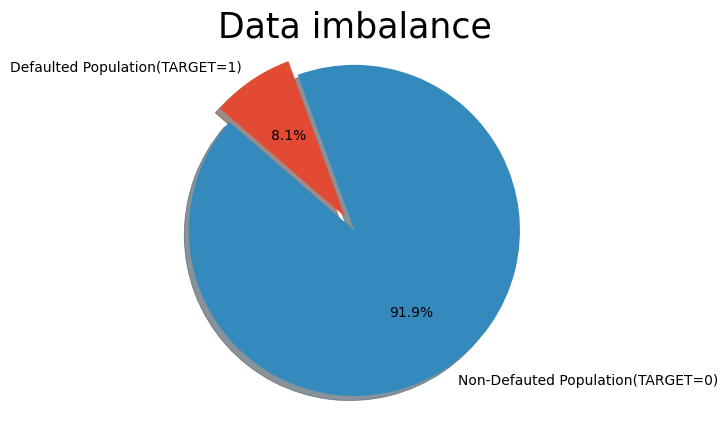

In [7]:
count1 = 0 
count0 = 0
for i in df1['TARGET'].values:
    if i == 1:
        count1 += 1
    else:
        count0 += 1
        
count1 = (count1/len(df1['TARGET']))*100
count0 = (count0/len(df1['TARGET']))*100

x = ['Defaulted Population(TARGET=1)','Non-Defauted Population(TARGET=0)']
y = [count1, count0]

explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(y, explode=explode, labels=x, autopct='%1.1f%%',
        shadow=True, startangle=110)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Data imbalance',fontsize=25)
plt.show()

Univariante Analysis of Categorical columns with respect to Target variable

## 1. Gender Distribution based Target 0 and Target 1

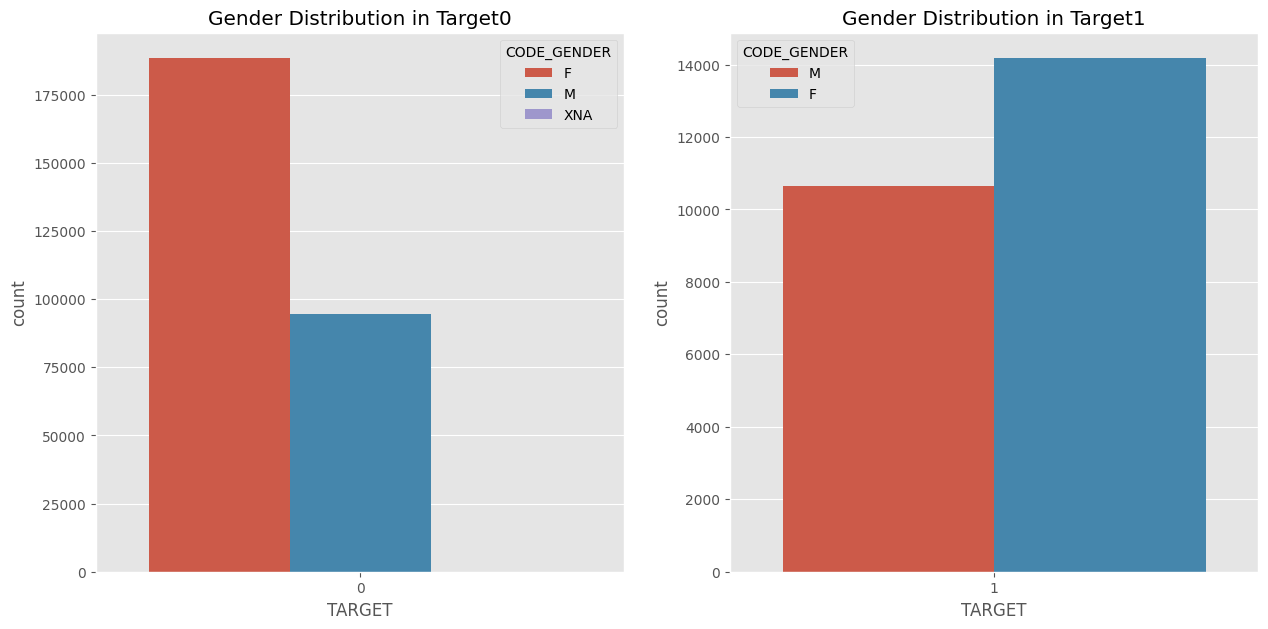

In [8]:
plt.figure(figsize=(15,7))
plt.subplot(121)
sns.countplot(x='TARGET',
              hue='CODE_GENDER',
              data=Target0, 
              )
plt.title("Gender Distribution in Target0")
plt.subplot(122)
sns.countplot(x='TARGET',
              hue='CODE_GENDER',
              data=Target1, 
              )
plt.title("Gender Distribution in Target1")
plt.show()

## Insights:
- It seems like **Female clients applied higher than male clients for loan**
- **`66.6% Female`** clients are **non-defaulters** while **`33.4% male`** clients are **non-defaulters**.
- **`57% Female`** clients are **defaulters** while **`42% male`** clients are **defaulters**.

## 2 AGE Distribution based on  Target 0 and Target 1

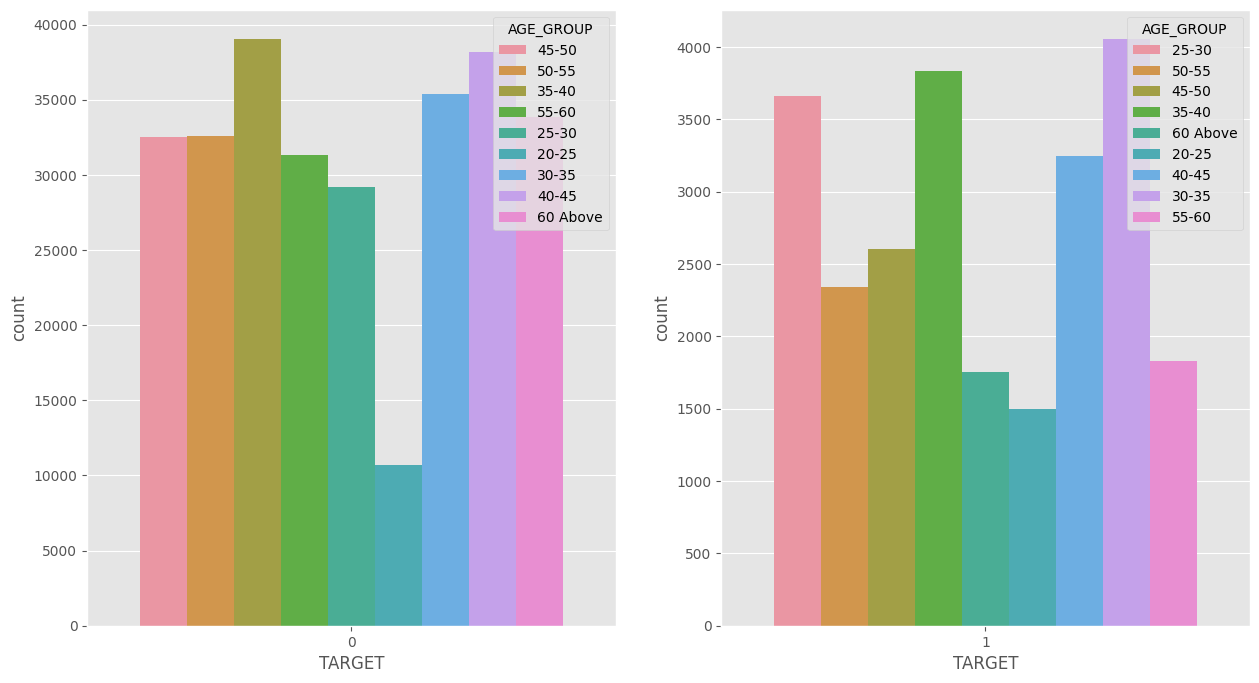

In [9]:
plt.figure(figsize=(15,8)) 
plt.subplot(121)
sns.countplot(x='TARGET',
              hue='AGE_GROUP',
              data=Target0)
plt.subplot(122)
sns.countplot(x='TARGET',
              hue='AGE_GROUP',
              data=Target1)
plt.show()

## Insights:

- **`Middle Age(35-60)`** group seems to applied higher than any other age group for loan in case of Defaulters as well as Non-defaulters.

- Also , **`Middle Age`** group facing paying difficulties the most.

- While **`Senior Citizens(60-100)`** and **`Very young(19-25)`** age group facing paying difficulties less as compared to other age groups.

## 3. ORGANIZATION'S distribution based on  Target 0 and Target 1

<Figure size 4000x500 with 0 Axes>

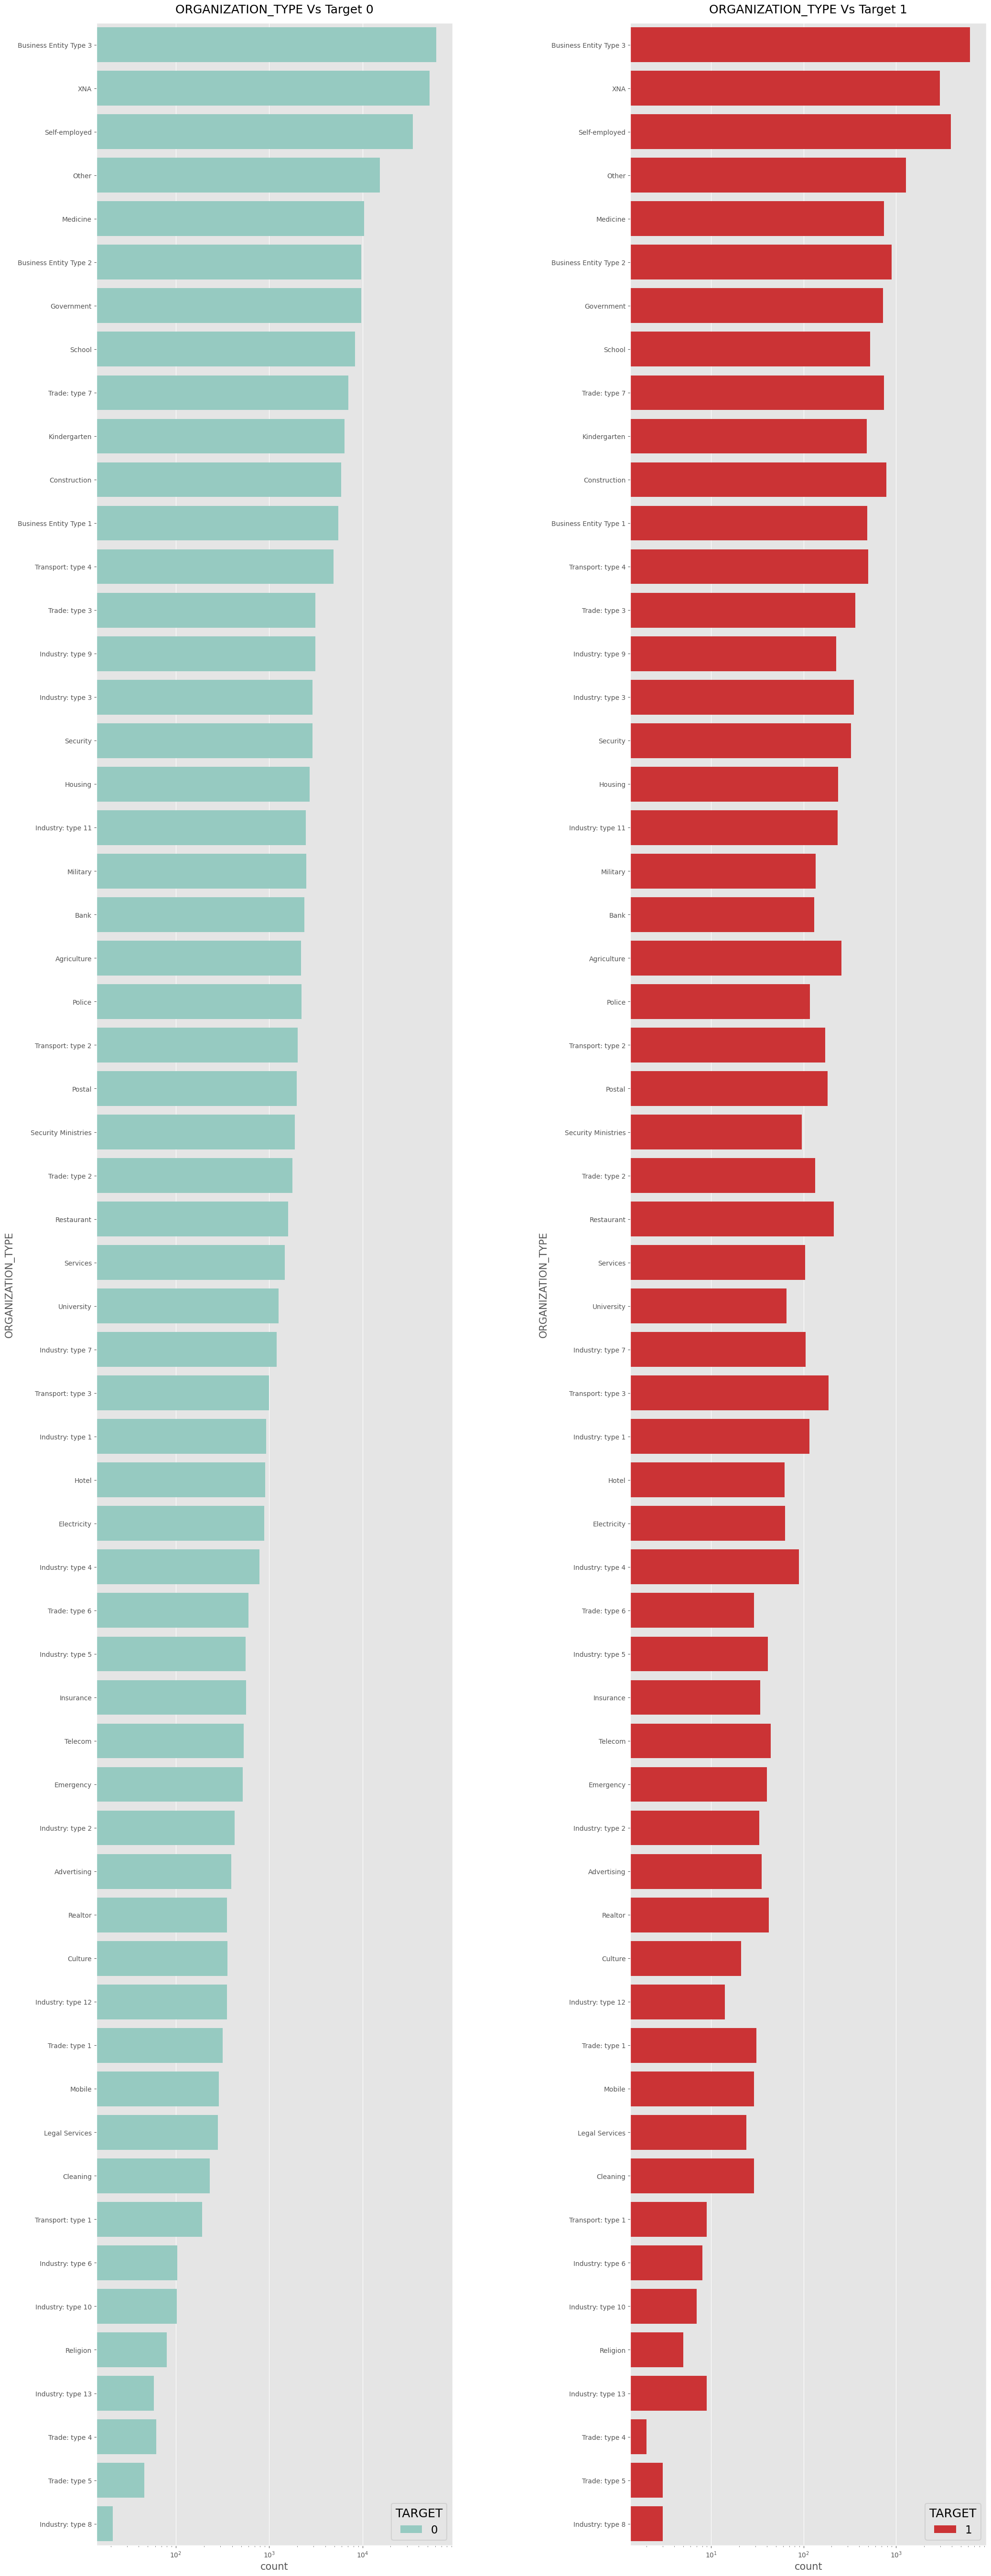

In [10]:
plt.figure(figsize=(40,5))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 15                                                        # Plot Configuration 
plt.rcParams['axes.titlepad'] = 15
fig, axes = plt.subplots(nrows=1,ncols=2)                  
sns.set_context('talk')
fig.subplots_adjust(left= 0.09,bottom=1,right=3,top= 12,wspace=0.5,hspace=0.3) 


plt.subplot(121)
plt.xscale('log')                                                                             # For Target0      
sns.countplot(data=Target0,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set3',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 0")



plt.subplot(122)
plt.xscale('log')                                                                              # For Target1
sns.countplot(data=Target1,y='ORGANIZATION_TYPE',
              order=df1['ORGANIZATION_TYPE'].value_counts().index,palette='Set1',hue = 'TARGET')
plt.title("ORGANIZATION_TYPE Vs Target 1")



plt.show();

**Insights:**

- ___(Defaulters as well as Non-defaulters)___ Clients with ORGANIZATION_TYPE **`Business Entity Type 3, Self-employed, Other ,Medicine, Government,Business Entity Type 2`** applied the most for the loan as compared to others



- ___(Defaulters as well as Non-defaulters)___ Clients having ORGANIZATION_TYPE **`Industry: type 13, Trade: type 4, Trade: type 5, Industry: type 8`** applied lower for the loan  as compared to others.

In [11]:
def categorical_plot(var):
    plt.figure(figsize=(40,20))
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 1)
    sns.countplot(var, data=Target0, palette = 'Set3', hue='TARGET') 
    plt.xlabel(var, fontsize= 30, fontweight="bold")                                                         #Target 0
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    
    plt.rcParams['axes.labelpad'] = 50
    plt.subplot(1, 2, 2)
    sns.countplot(var, data=Target1, palette = 'Set1', hue='TARGET')                                           # Target 1
    plt.xlabel(var, fontsize= 30, fontweight="bold")
    plt.ylabel('Payments Difficulties', fontsize= 30, fontweight="bold")
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    plt.show()

In [12]:
# storing numnercial and categorical columns as list in belows varibles

cat_col = list(df1.select_dtypes(["category"]).columns)   # Categorical columns list
num_col = list(df1.select_dtypes(["int","float"]).columns)  #N Numerical Column list

In [13]:
print(num_col)

['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'YEARS_EMPLOYED']


In [14]:
def uni(col):
    sns.set(style="darkgrid")
    plt.figure(figsize=(40,20))
    
   
    plt.subplot(1,2,1)                                   
    sns.distplot(Target0[col], color="g" )
    plt.yscale('linear') 
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Non Payment Difficulties', fontsize= 30, fontweight="bold")                    #Target 0
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
     
    
    
    
    plt.subplot(1,2,2)                                                                                                      
    sns.distplot(Target1[col], color="r")
    plt.yscale('linear')    
    plt.xlabel(col, fontsize= 30, fontweight="bold")
    plt.ylabel('Payment Difficulties', fontsize= 30, fontweight="bold")                       # Target 1
    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(rotation=360, fontsize=30)
    
    plt.show();

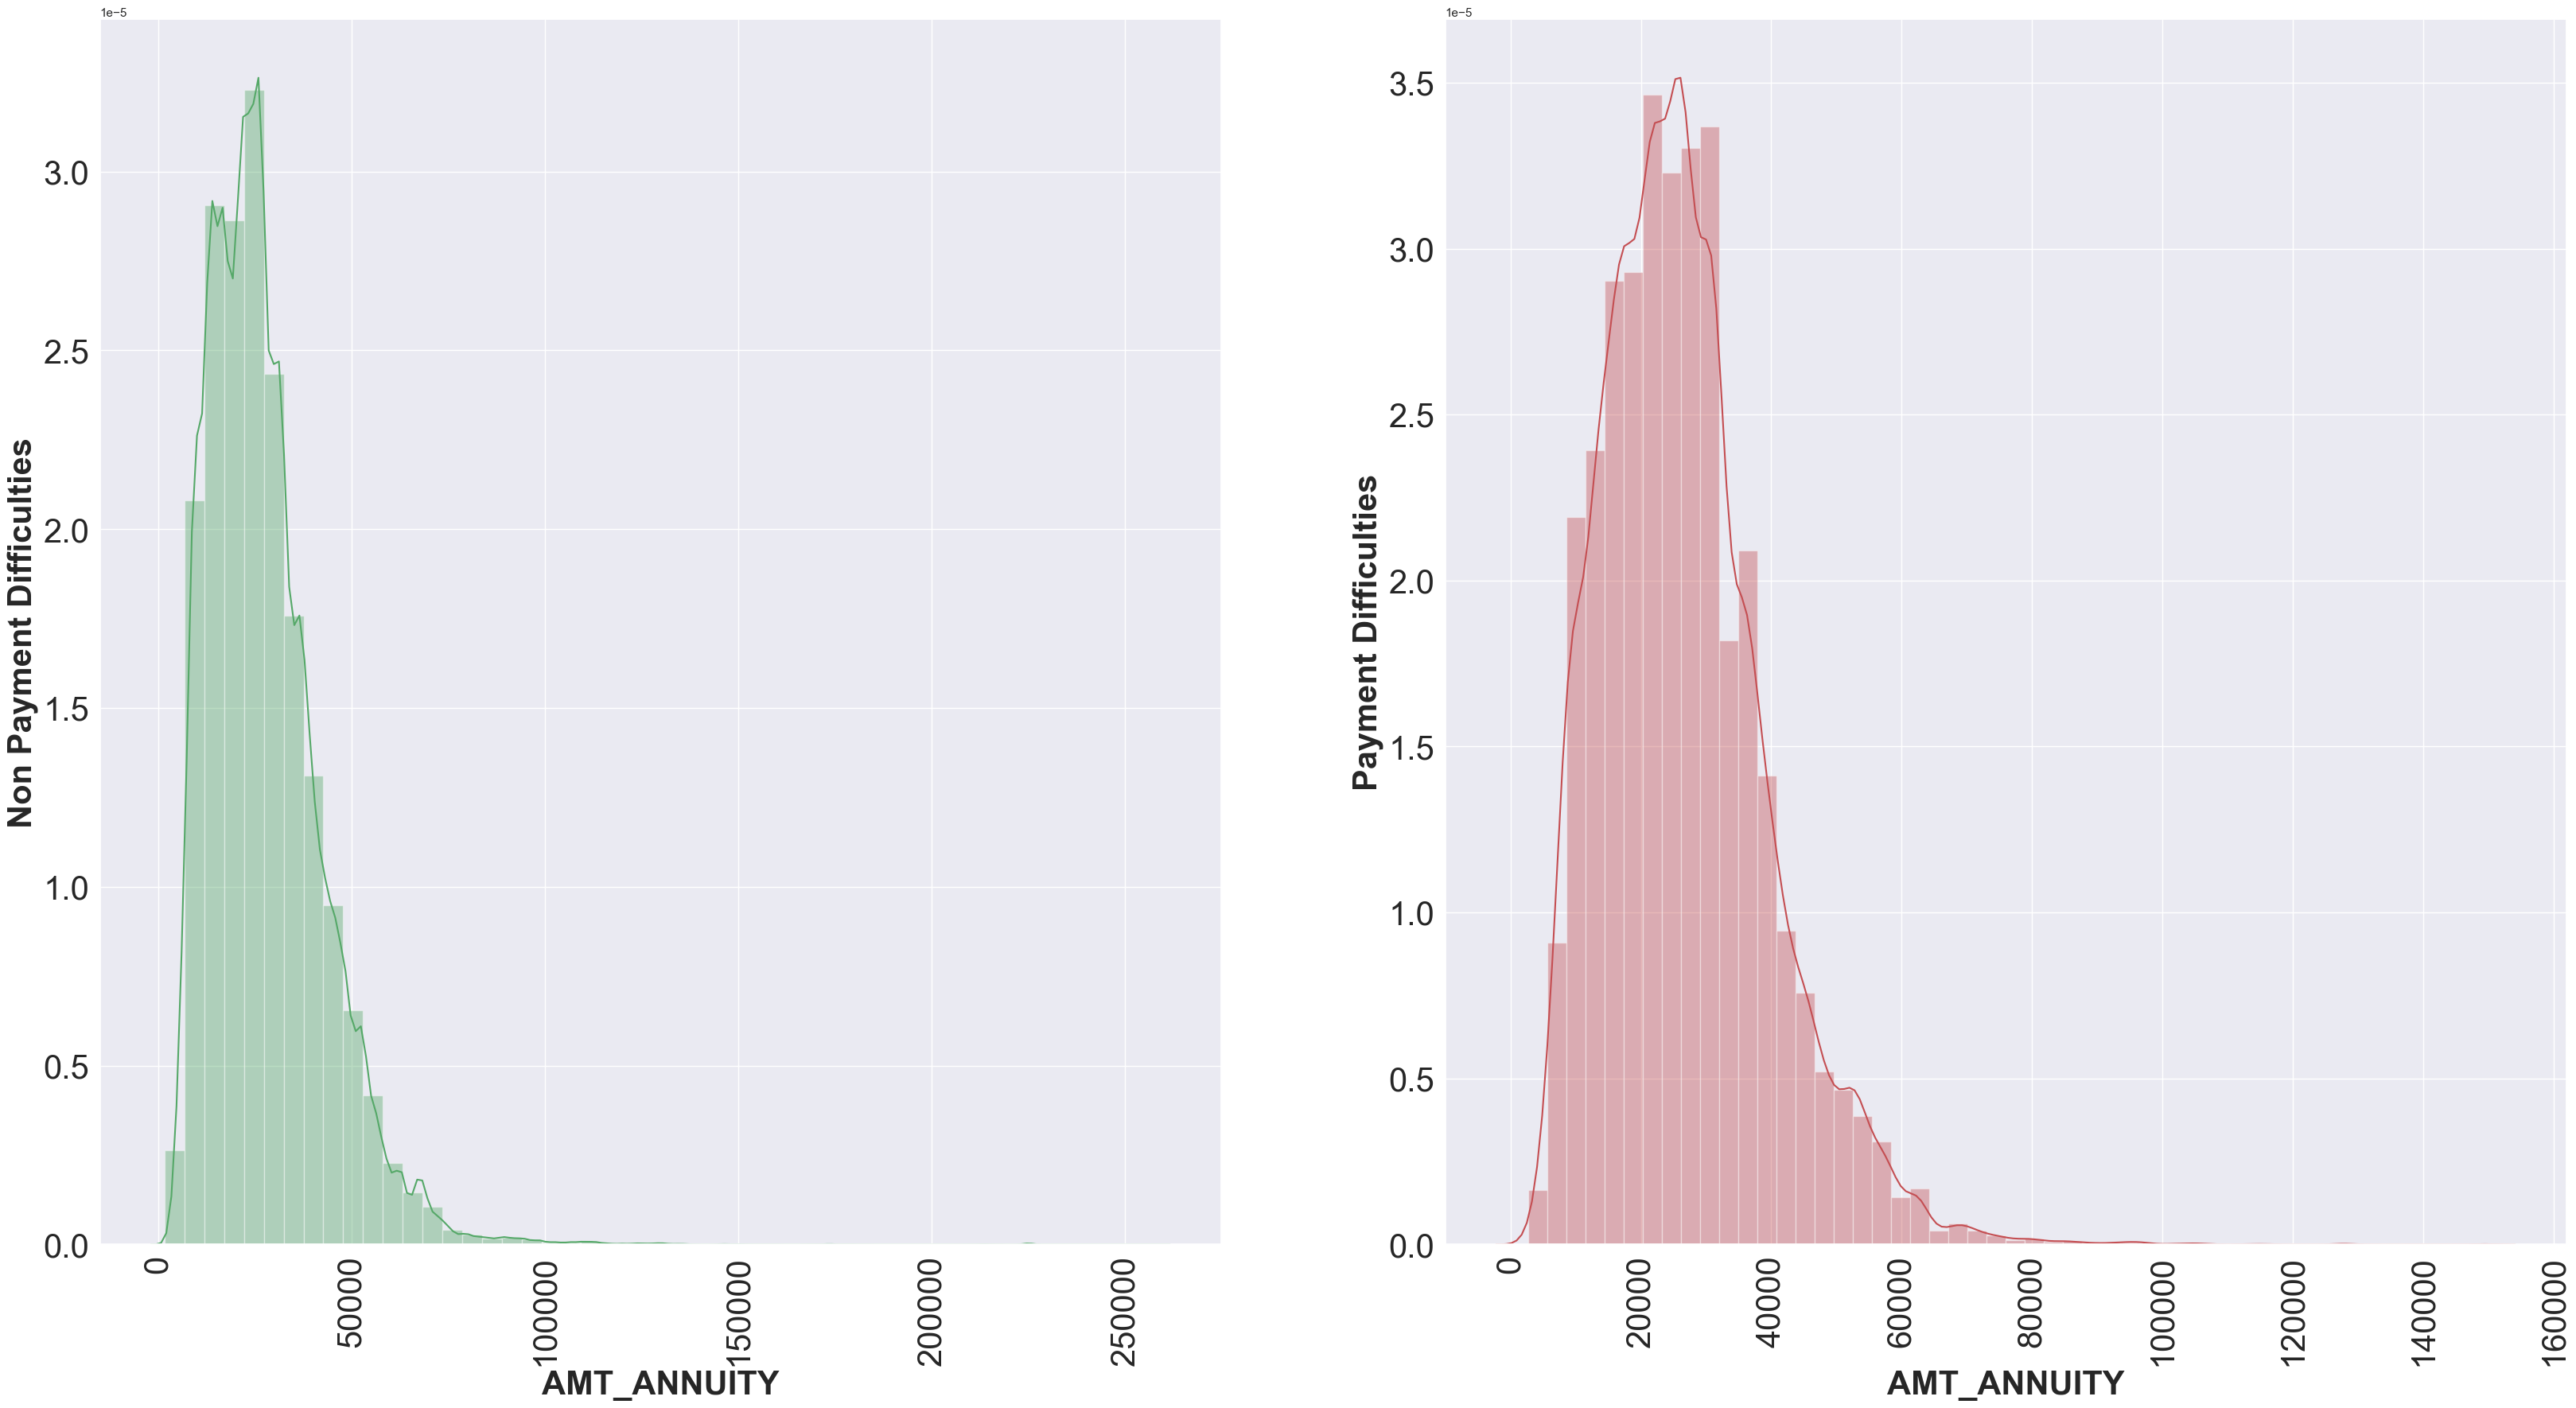

In [15]:
uni(col='AMT_ANNUITY') 

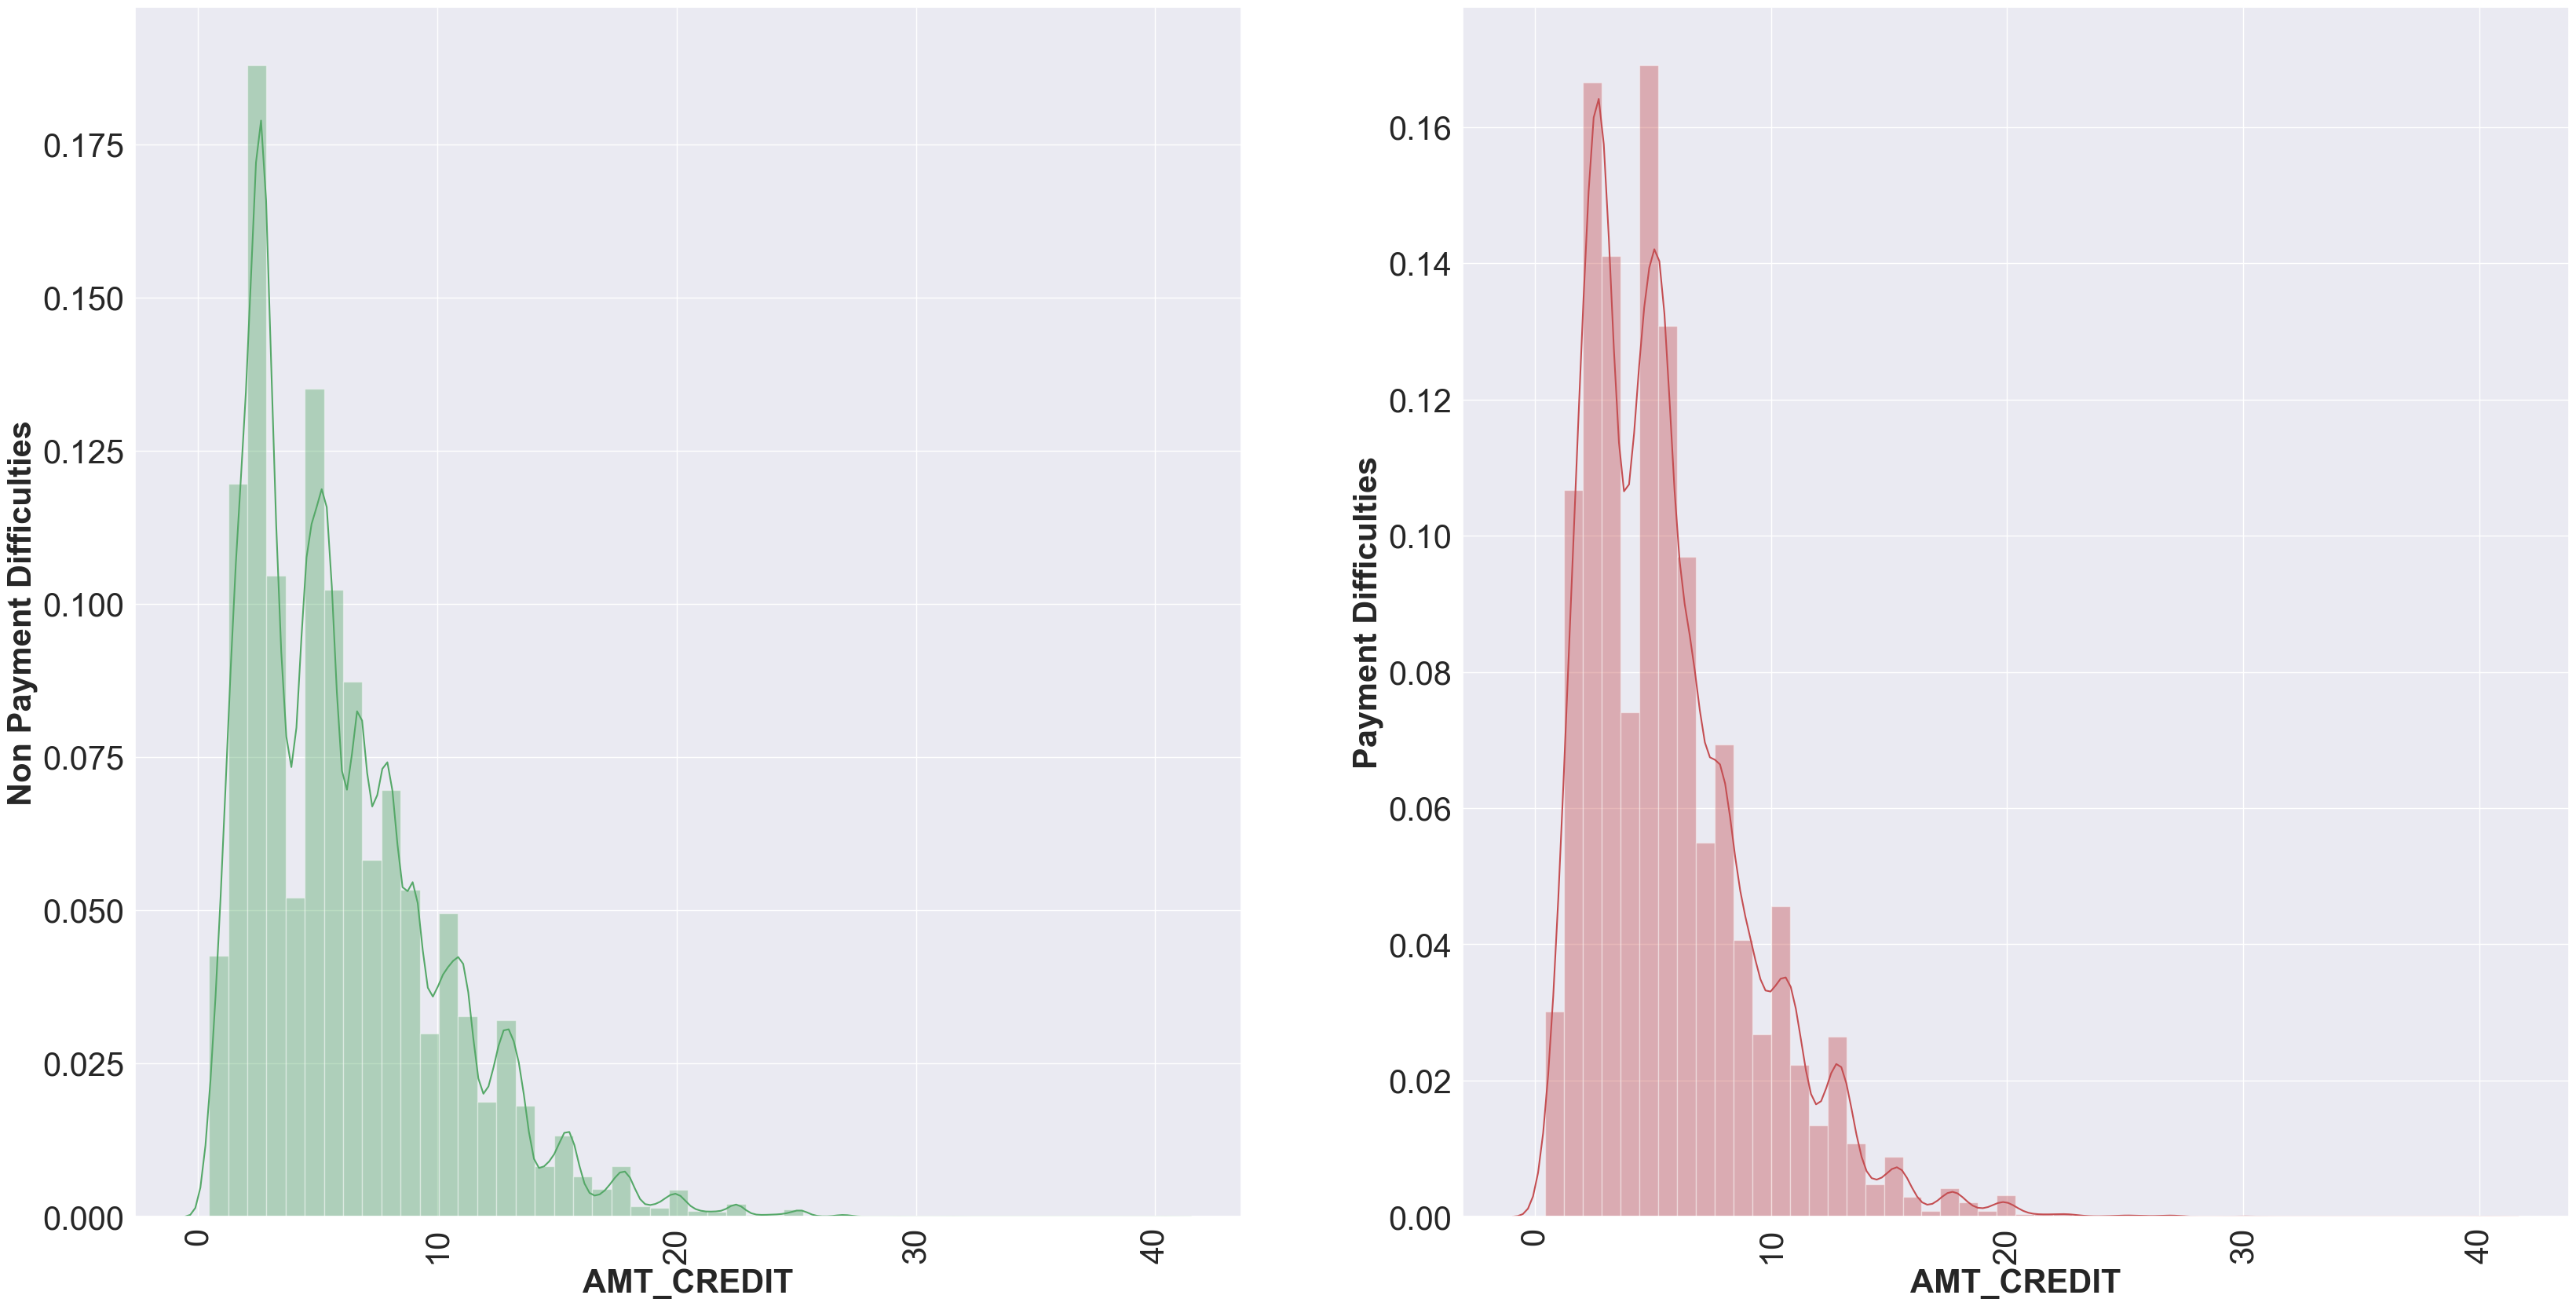

In [16]:
uni(col='AMT_CREDIT')   

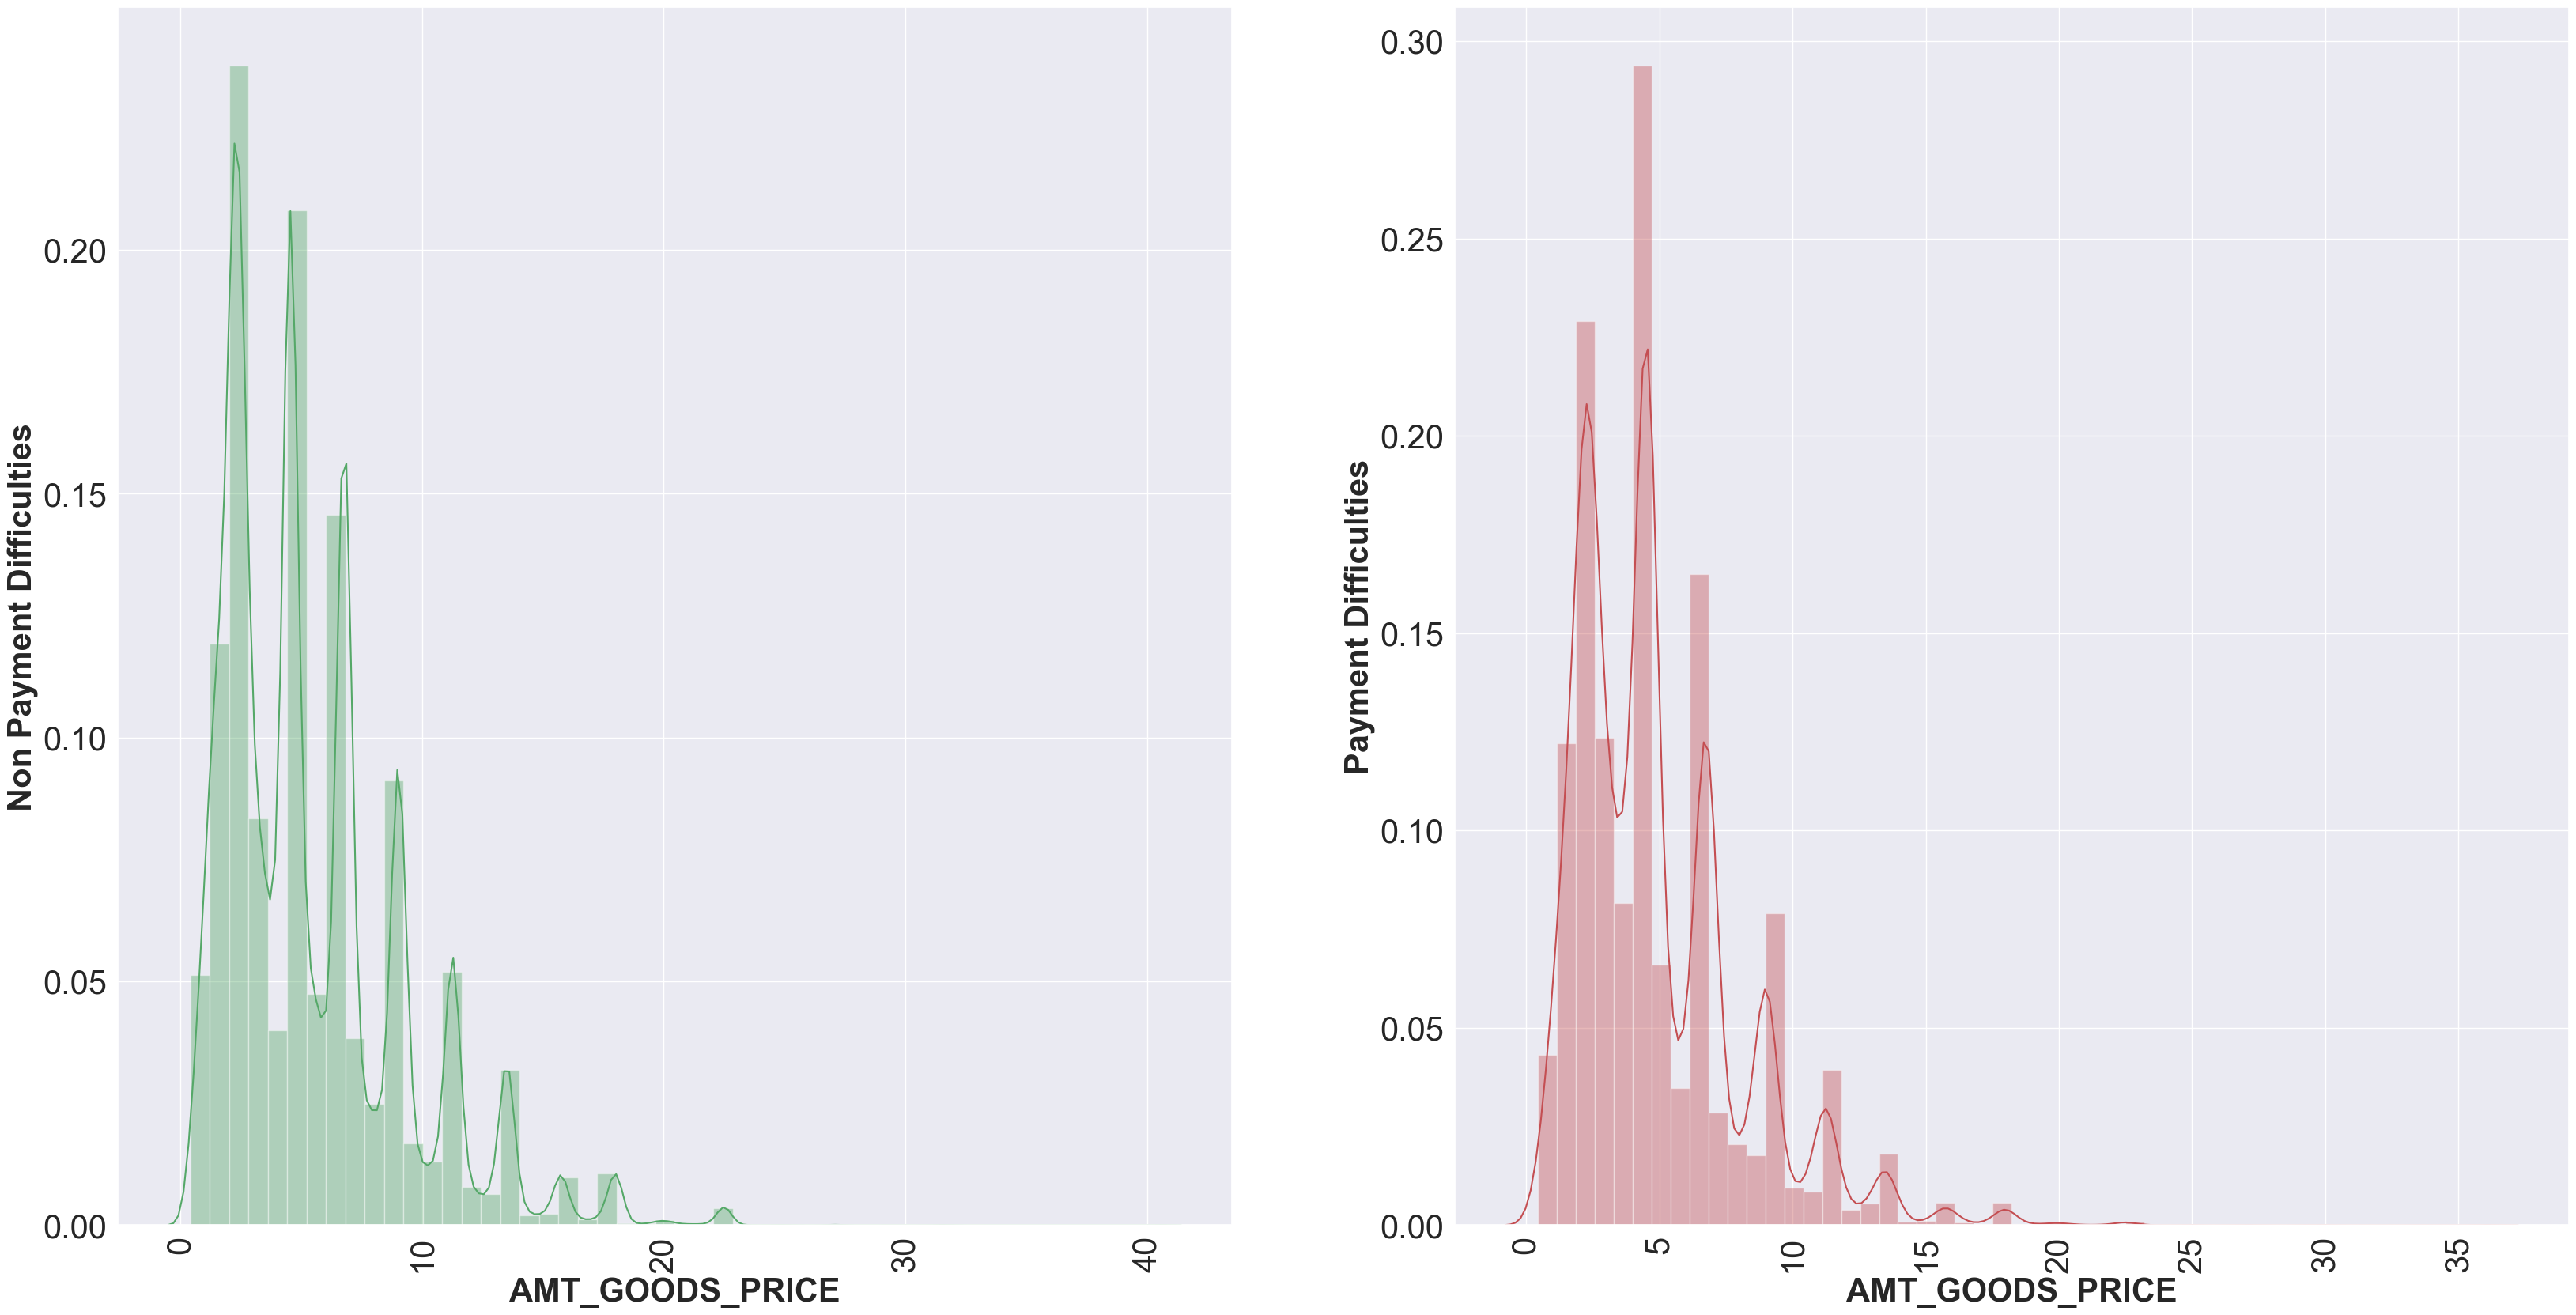

In [17]:
uni(col='AMT_GOODS_PRICE')  

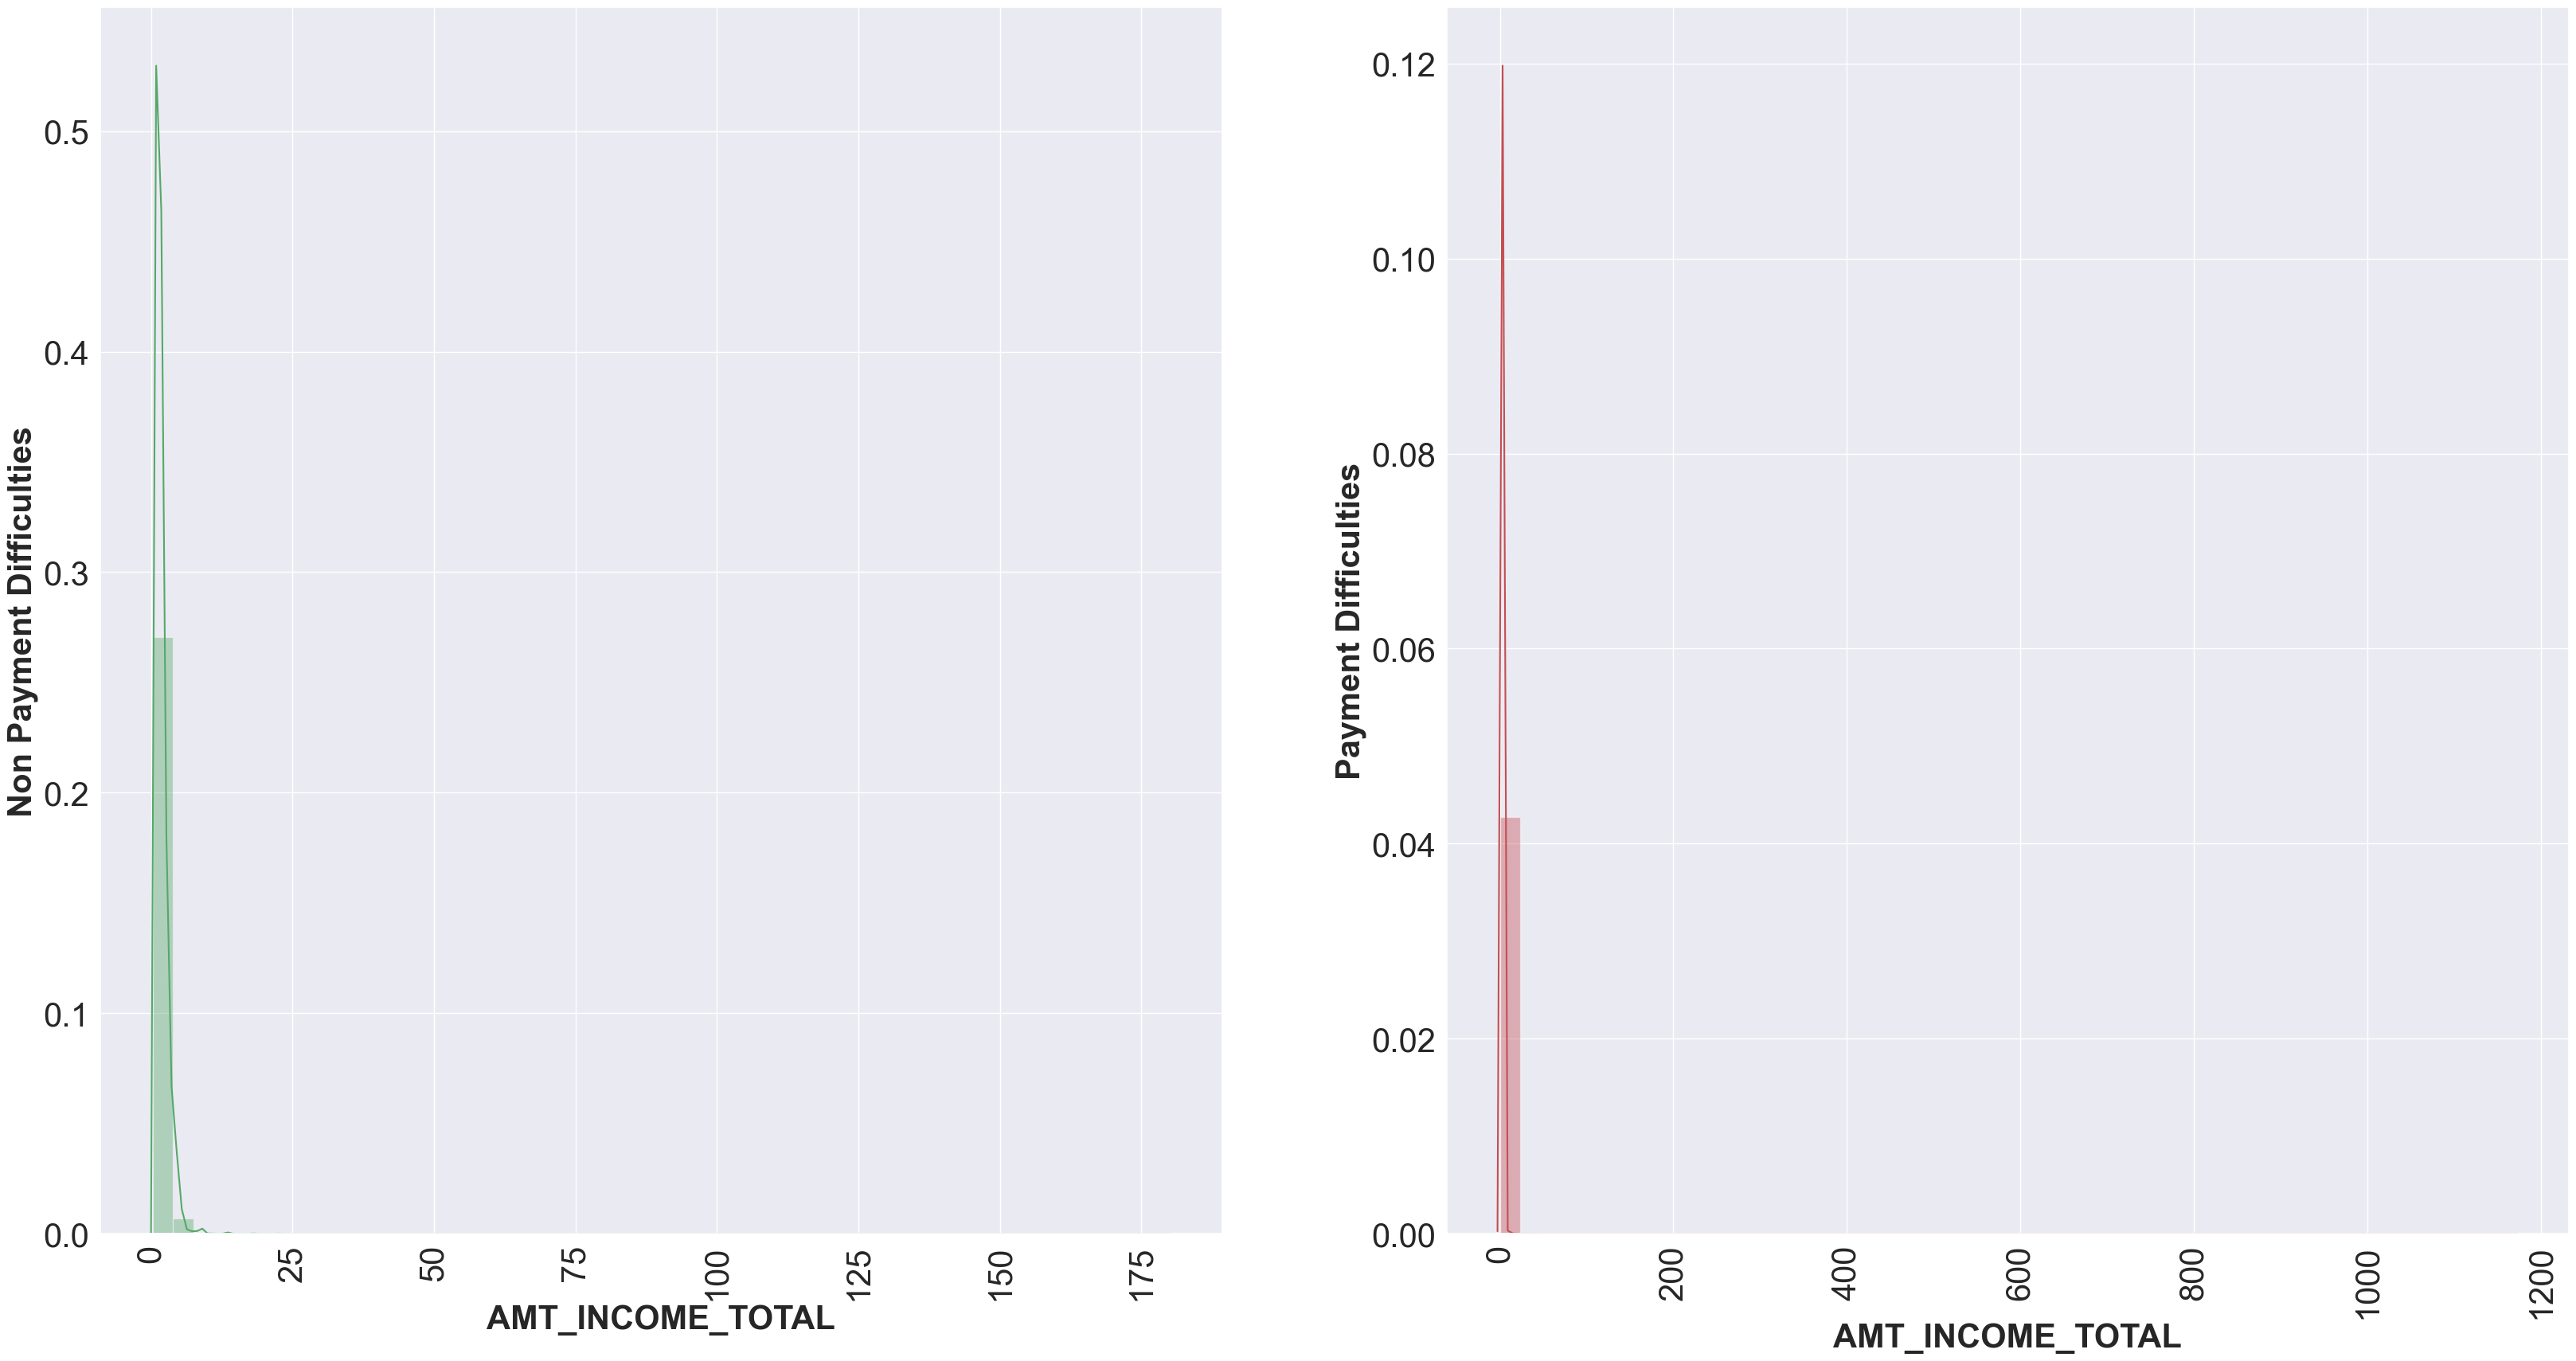

In [18]:
uni(col='AMT_INCOME_TOTAL') 

In [ ]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


# Repayers dataframe
Repayer_df = df1.loc[df1['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = df1.loc[df1['TARGET']==1, cols_for_correlation]

**Correlation between numeric variable**

In [ ]:
# Getting  top 10 correlation for the Repayers dataframe

corr_repayer = Repayer_df.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

VAR1                        VAR2  Correlation
122              AMT_GOODS_PRICE                  AMT_CREDIT     0.987250
371  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.950149
300              CNT_FAM_MEMBERS                CNT_CHILDREN     0.878571
495  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
588      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.830381
123              AMT_GOODS_PRICE                 AMT_ANNUITY     0.776686
92                   AMT_ANNUITY                  AMT_CREDIT     0.771309
216                DAYS_EMPLOYED                  DAYS_BIRTH     0.626114
335         REGION_RATING_CLIENT  REGION_POPULATION_RELATIVE     0.539005
365  REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE     0.537301

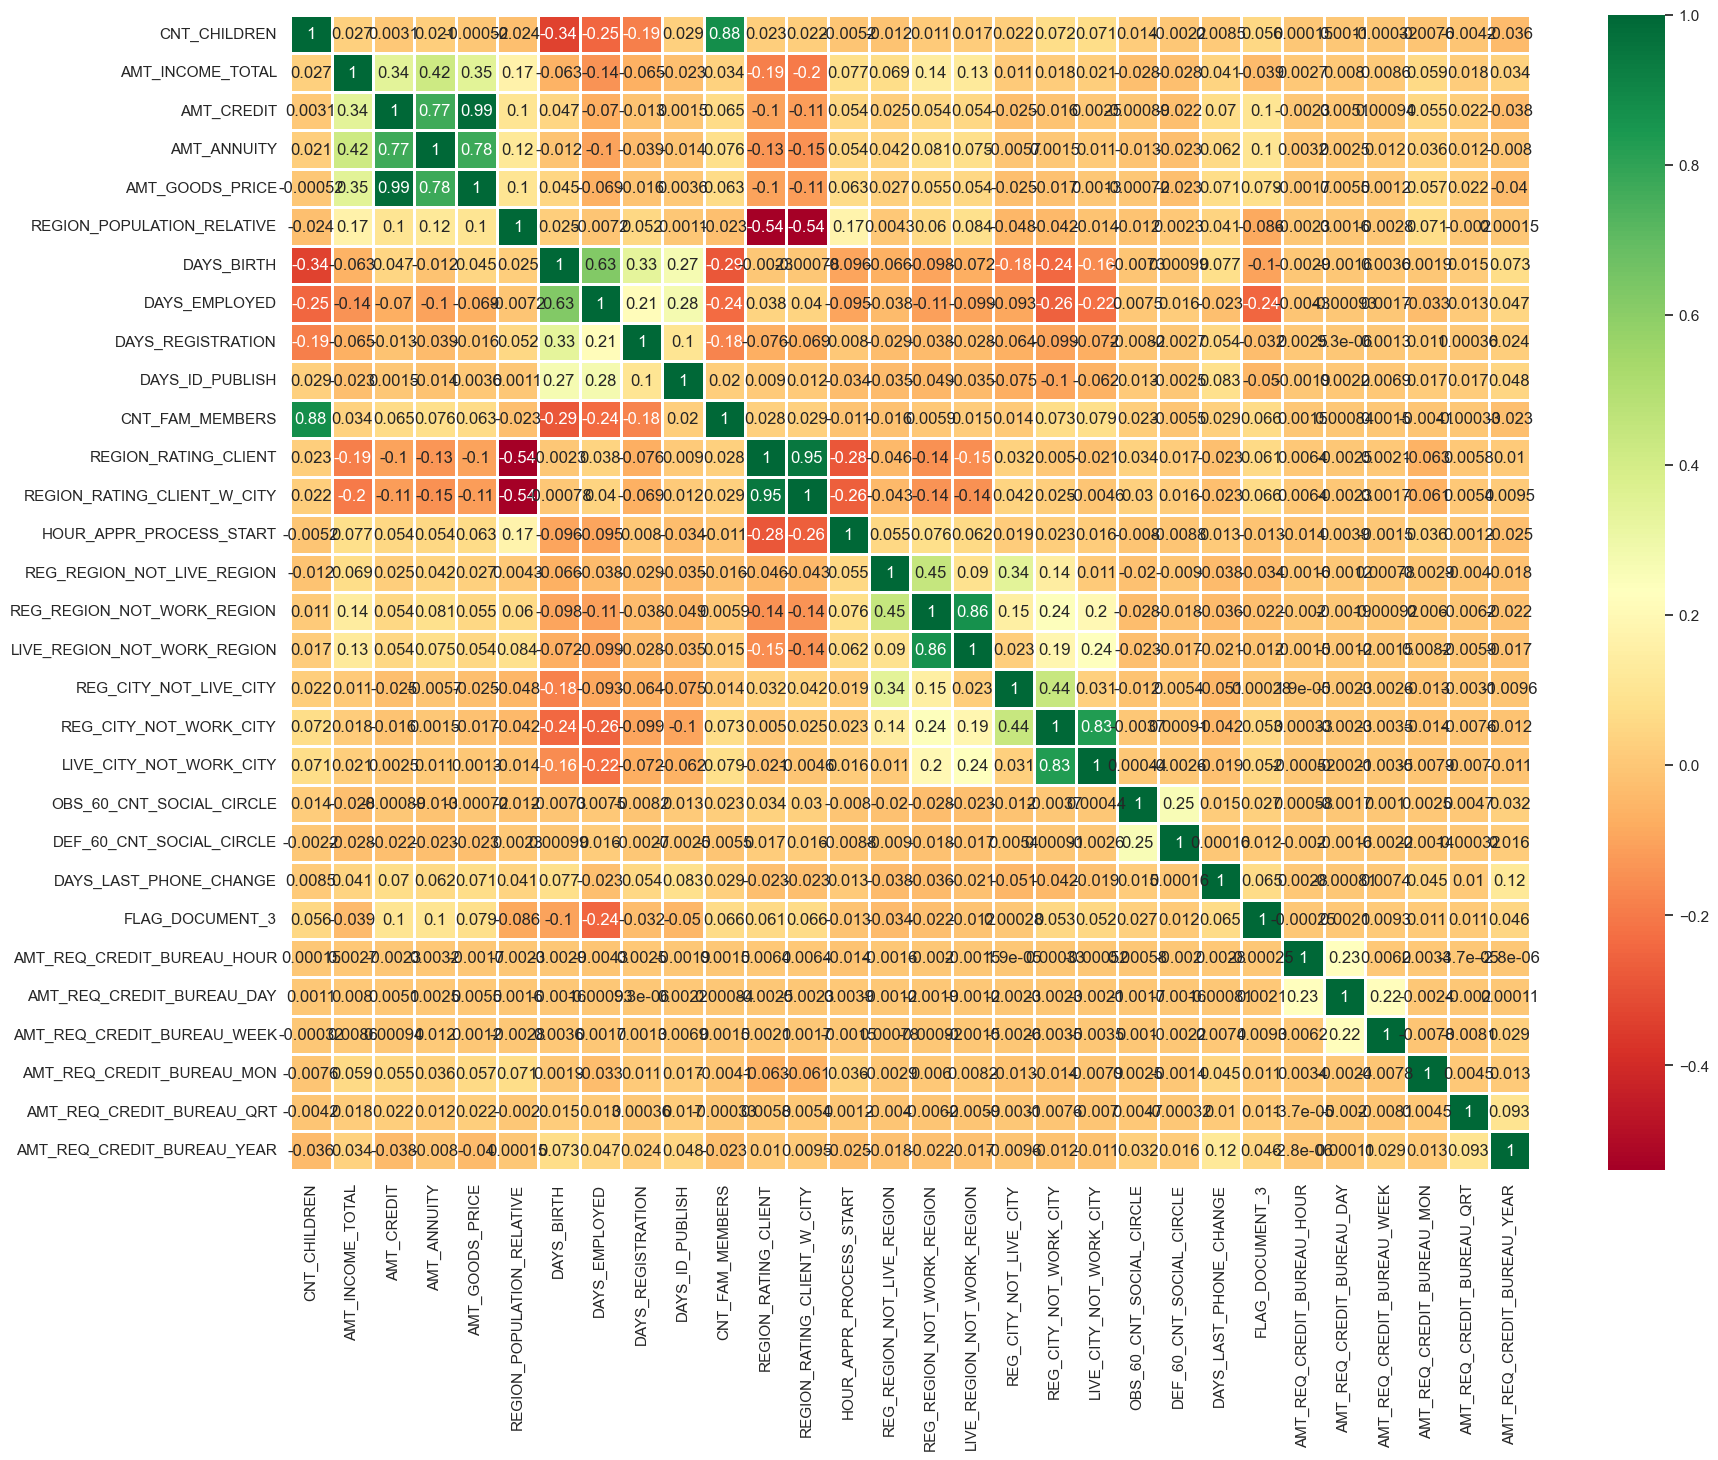

In [ ]:
#plotting heatmap to see linear correlation amoung Repayers 

fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences:**
**Correlating factors amongst repayers**

**1. Credit amount is highly correlated with:**
* **Goods Price Amount**
* **Loan Annuity**
* **Total Income**

**2. We can also see that repayers have high correlation in number of days employed.**

In [ ]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

VAR1                        VAR2  Correlation
122              AMT_GOODS_PRICE                  AMT_CREDIT     0.983103
371  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT     0.956637
300              CNT_FAM_MEMBERS                CNT_CHILDREN     0.885484
495  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
588      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778540
123              AMT_GOODS_PRICE                 AMT_ANNUITY     0.752699
92                   AMT_ANNUITY                  AMT_CREDIT     0.752195
216                DAYS_EMPLOYED                  DAYS_BIRTH     0.582185
464   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.497937
557       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.472052

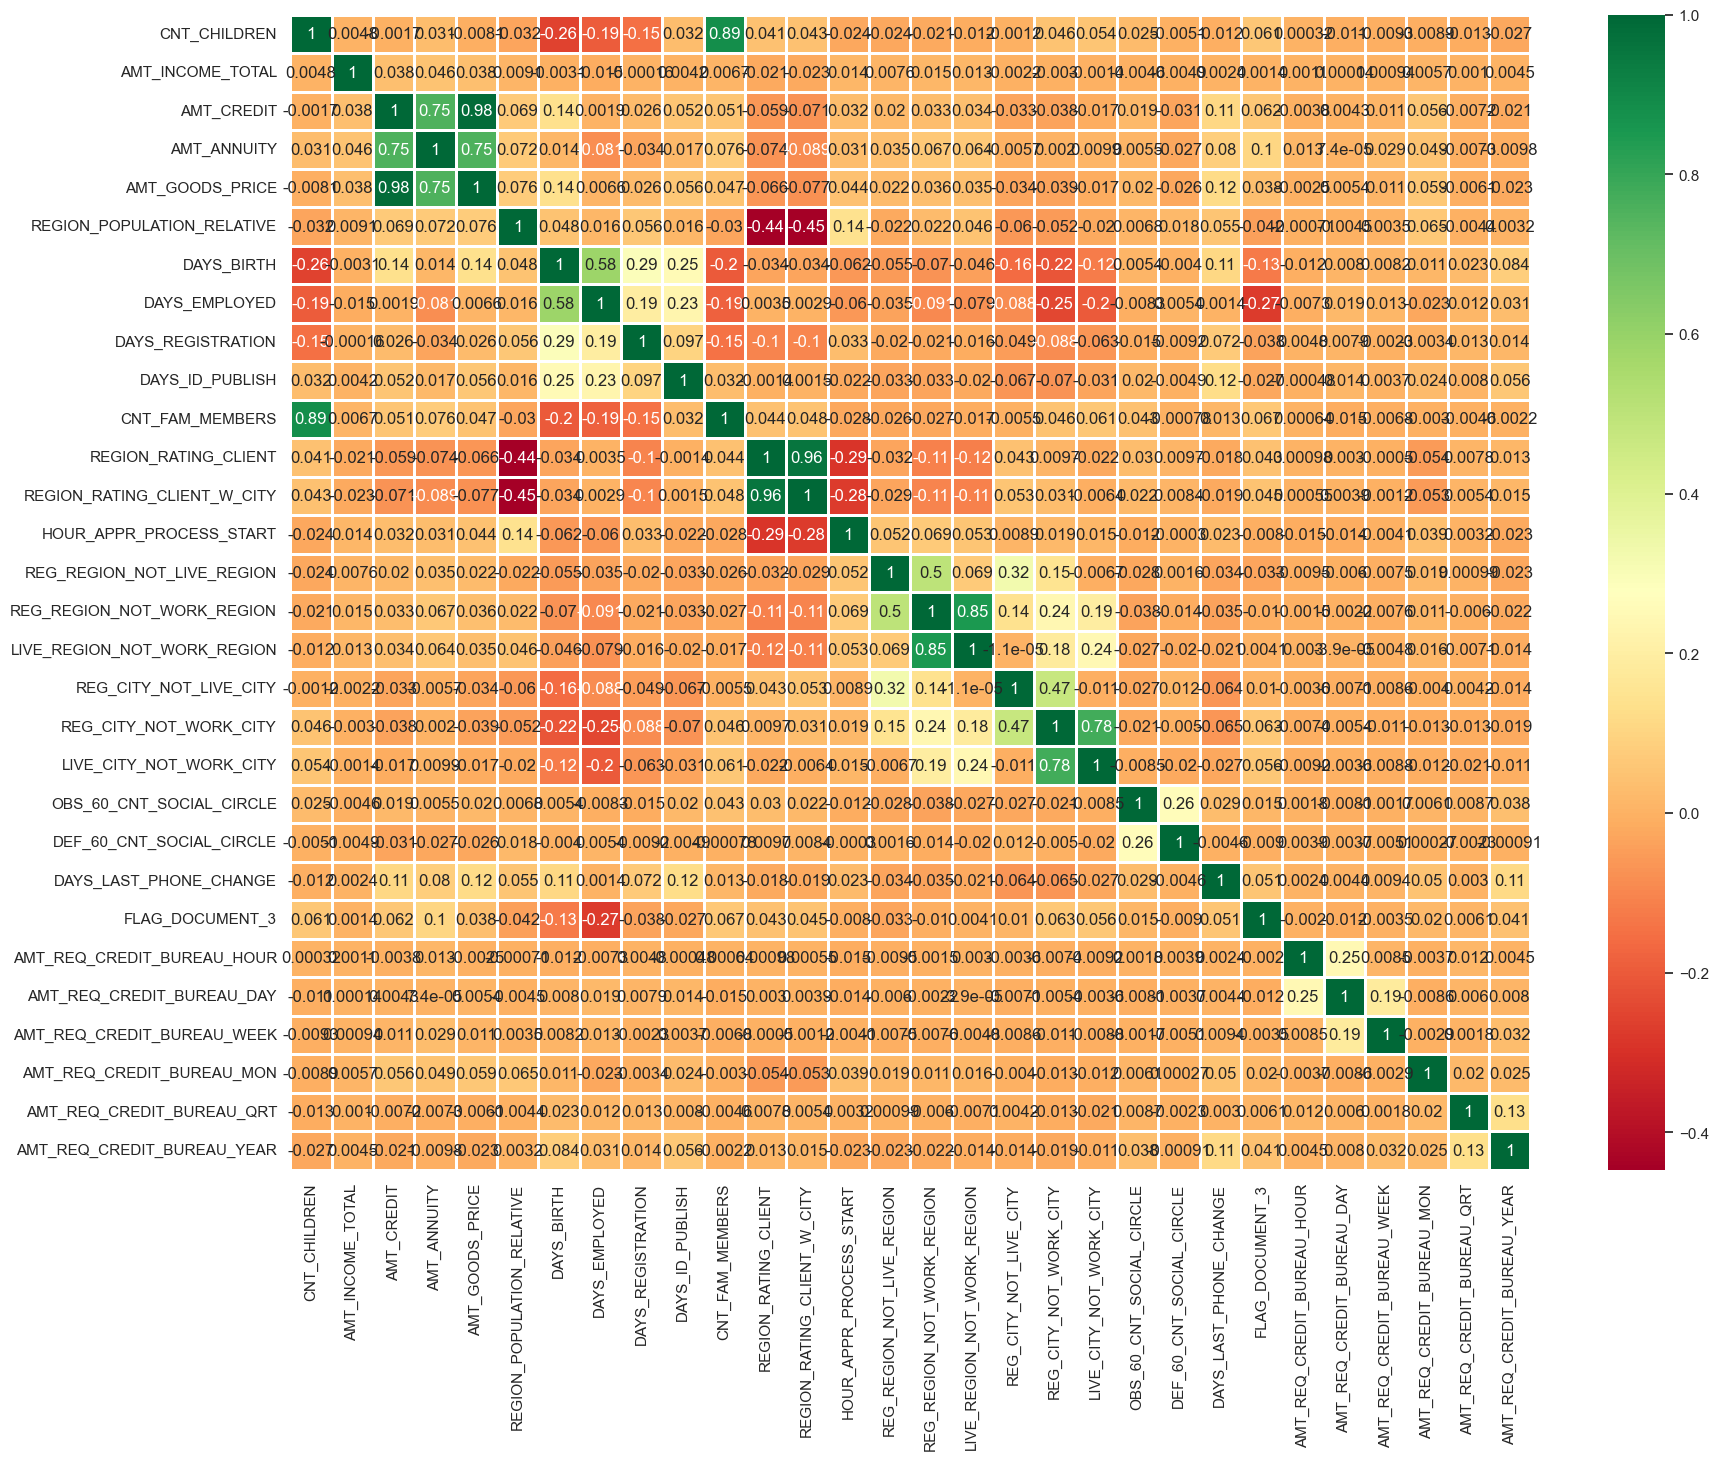

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=True,linewidth =1)

**Inferences: Correlating factors amongst repayers**
* **Credit amount is highly correlated with good price amount which is same as repayers.**
* **Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)**
* **We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).**
* **There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.**
* **Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.**
* **There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)**

Numerical Univariate Analysis

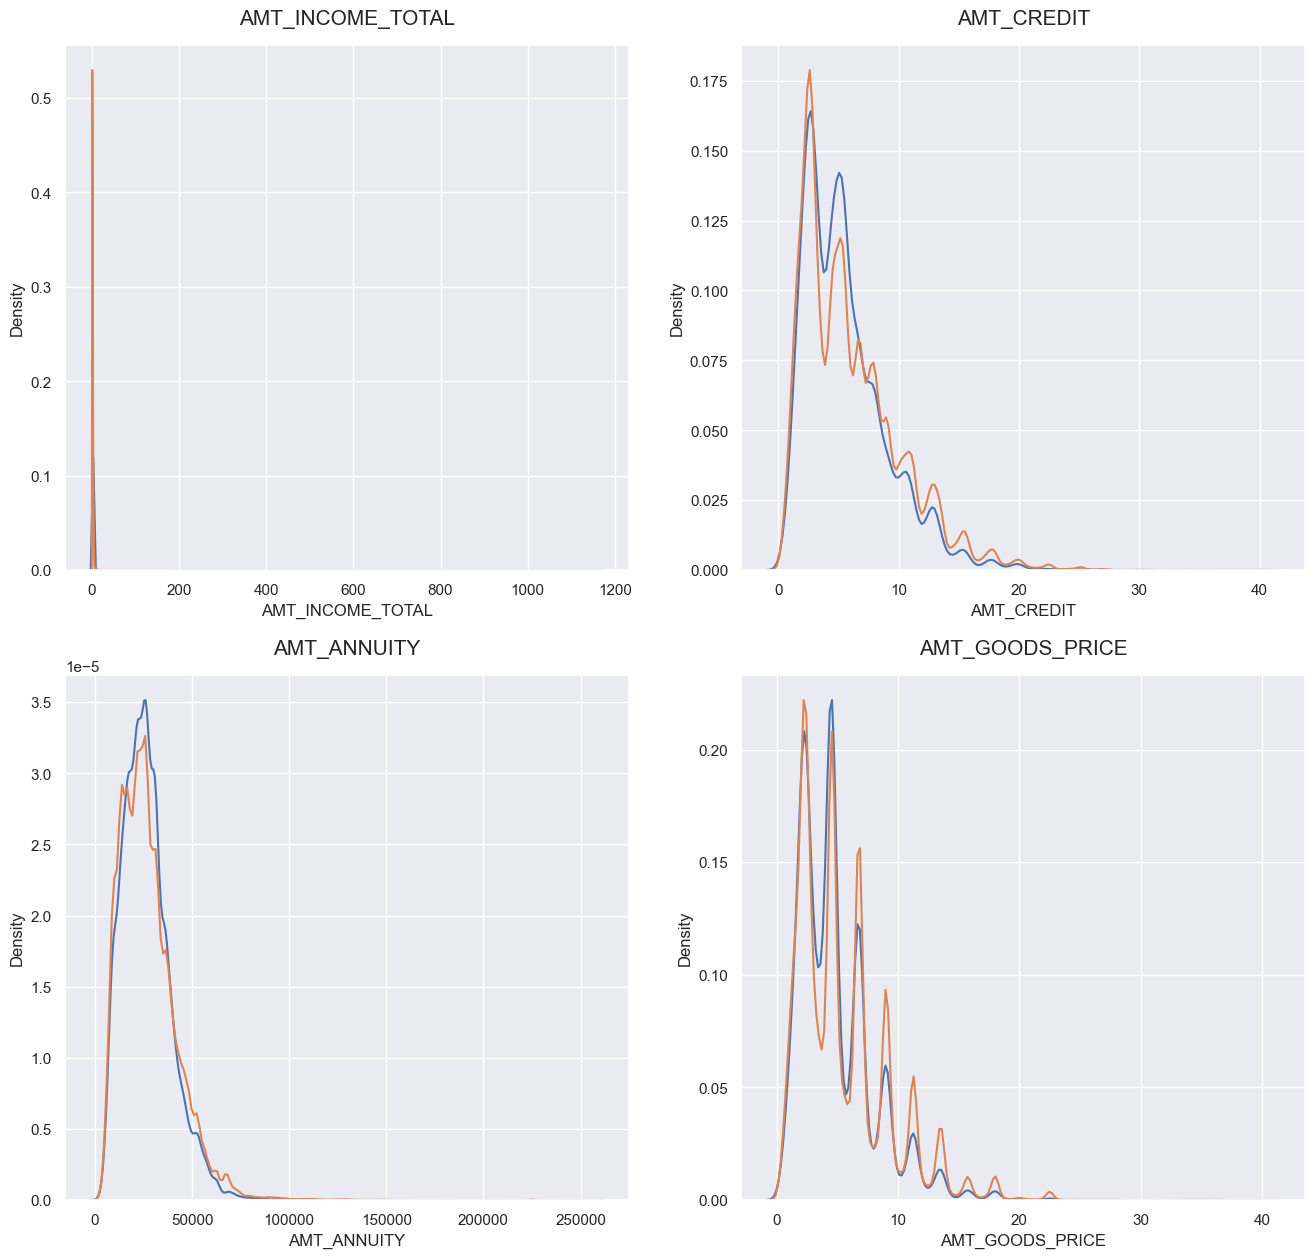

In [ ]:
amount = df1[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,15))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False,label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5})
    


plt.show()

**Inferences:**
* **Most no of loans are given for goods price below 10 lakhs**
* **Most people pay annuity below 50K for the credit loan**
* **Credit amount of the loan is mostly less then 10 lakhs**
* **The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision**

Numerical Bivariate Analysis

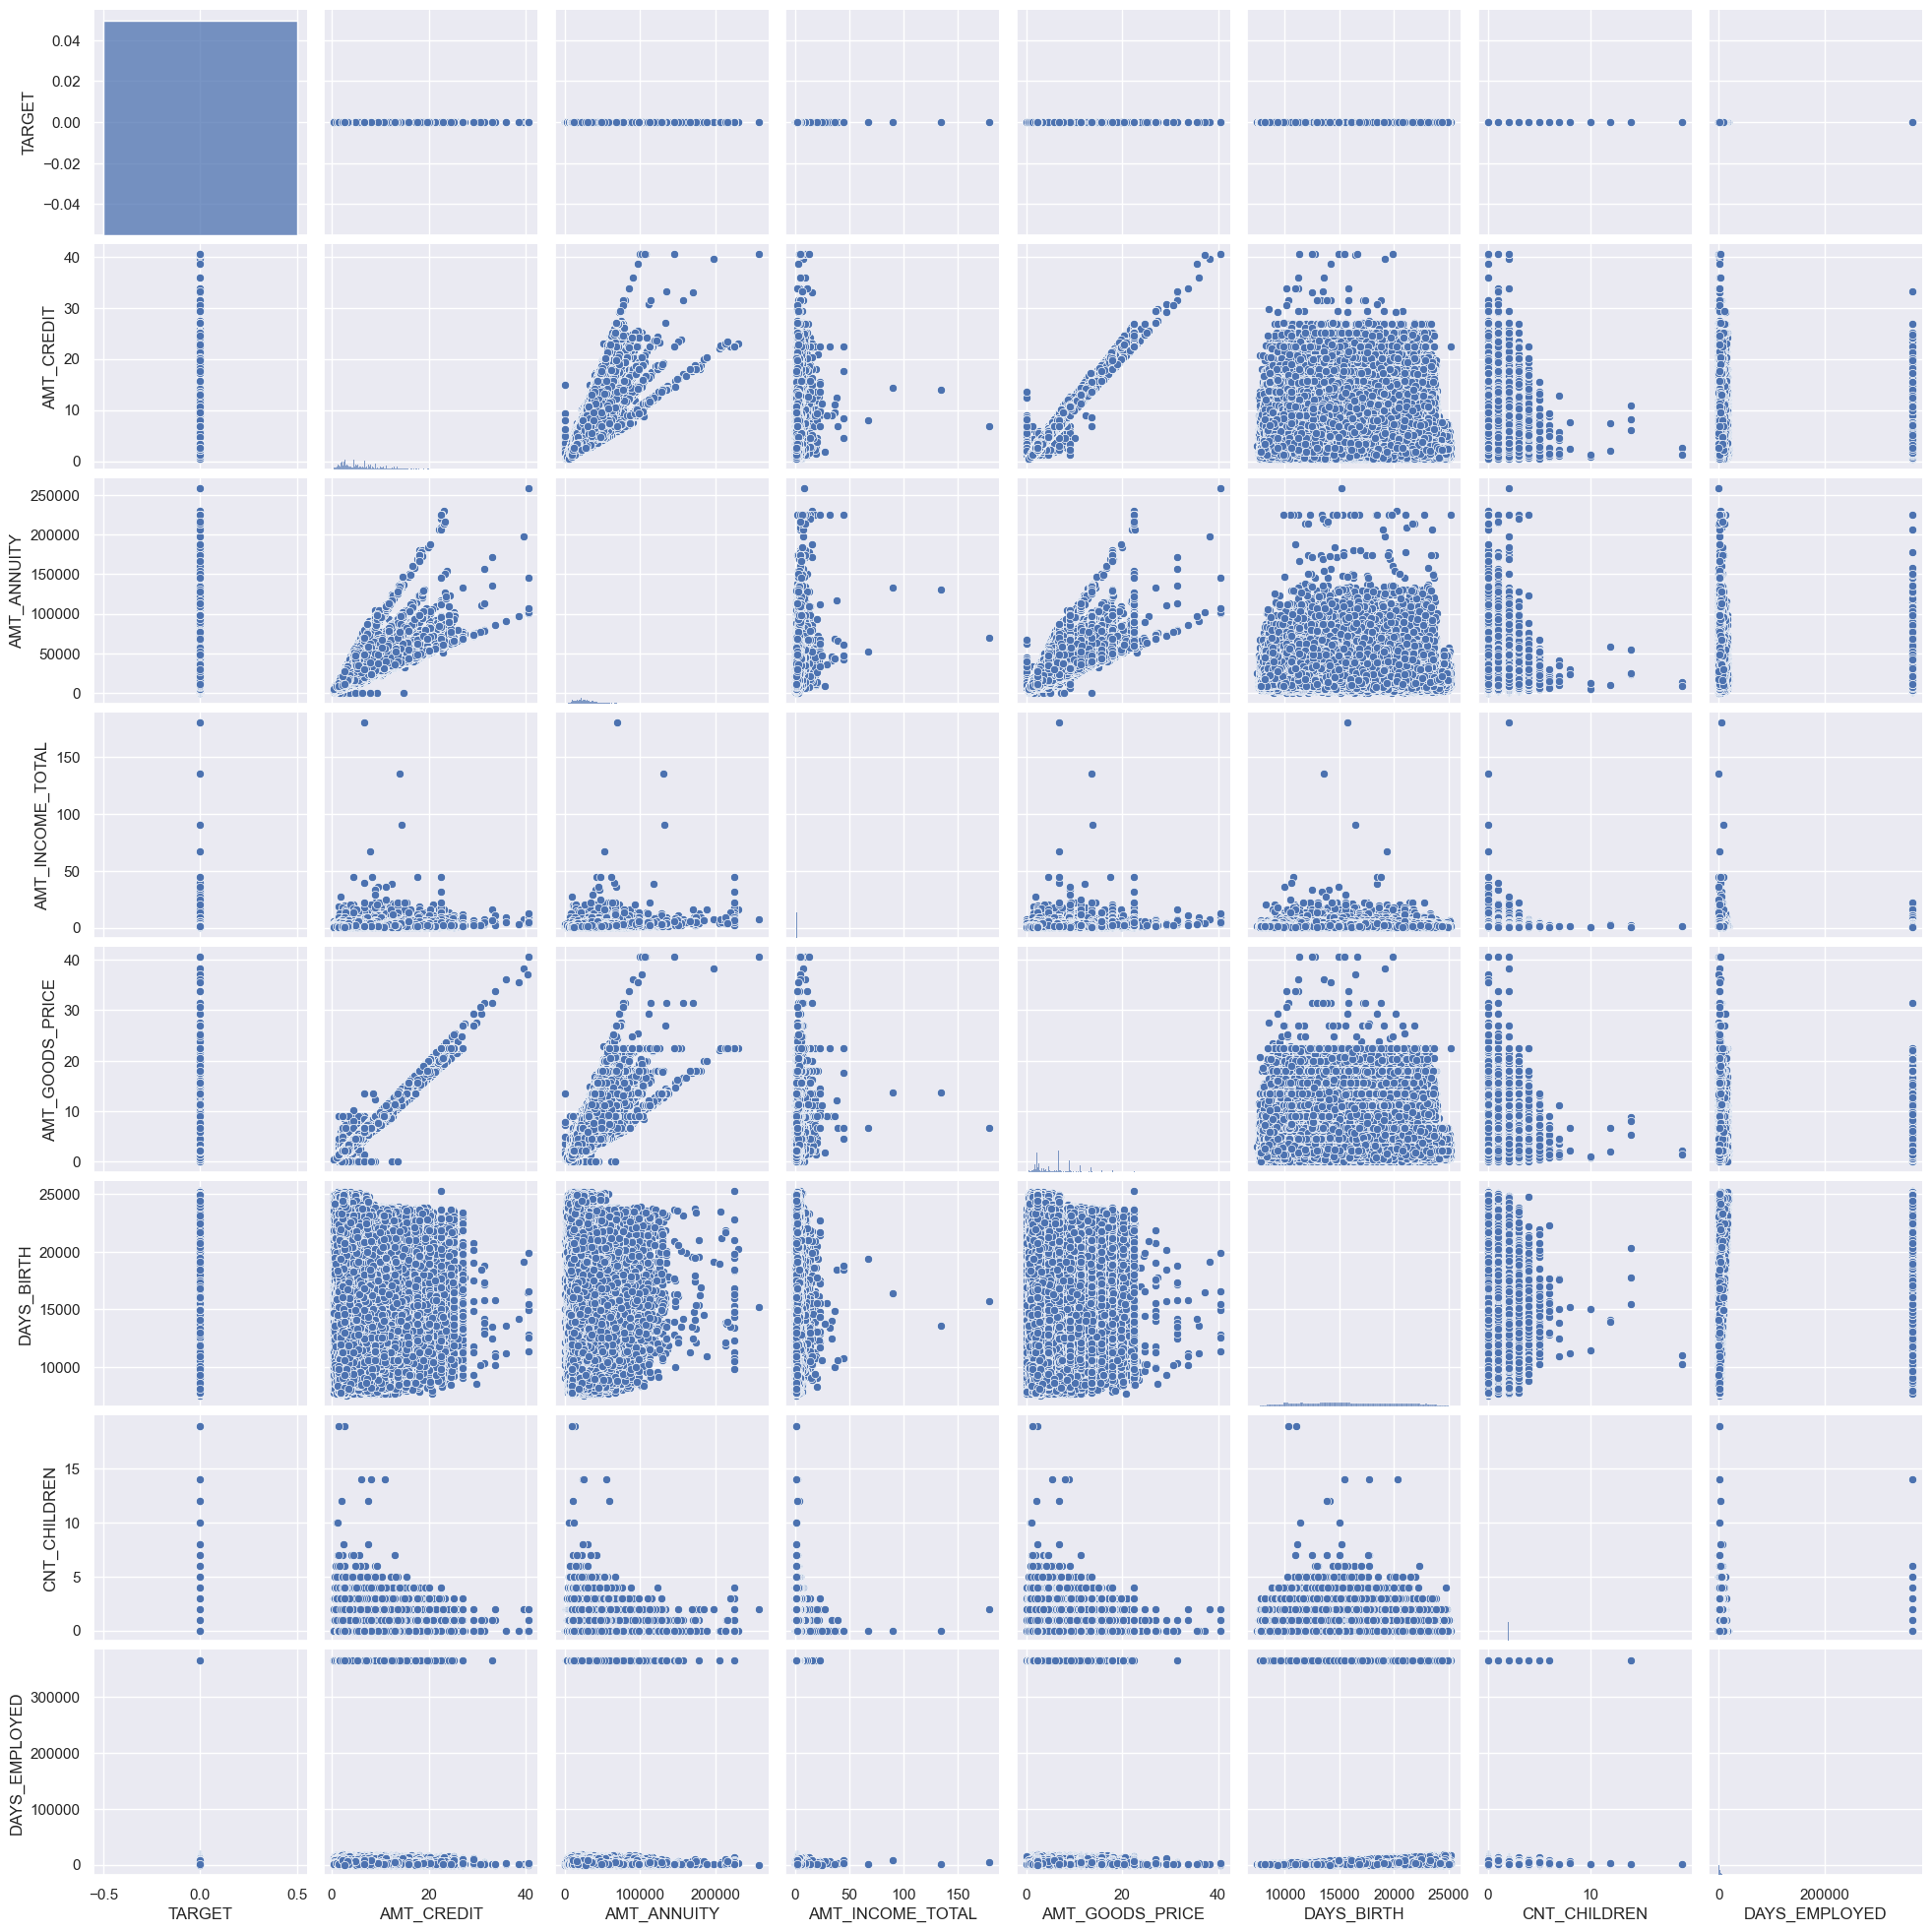

In [ ]:
pair = Target0[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

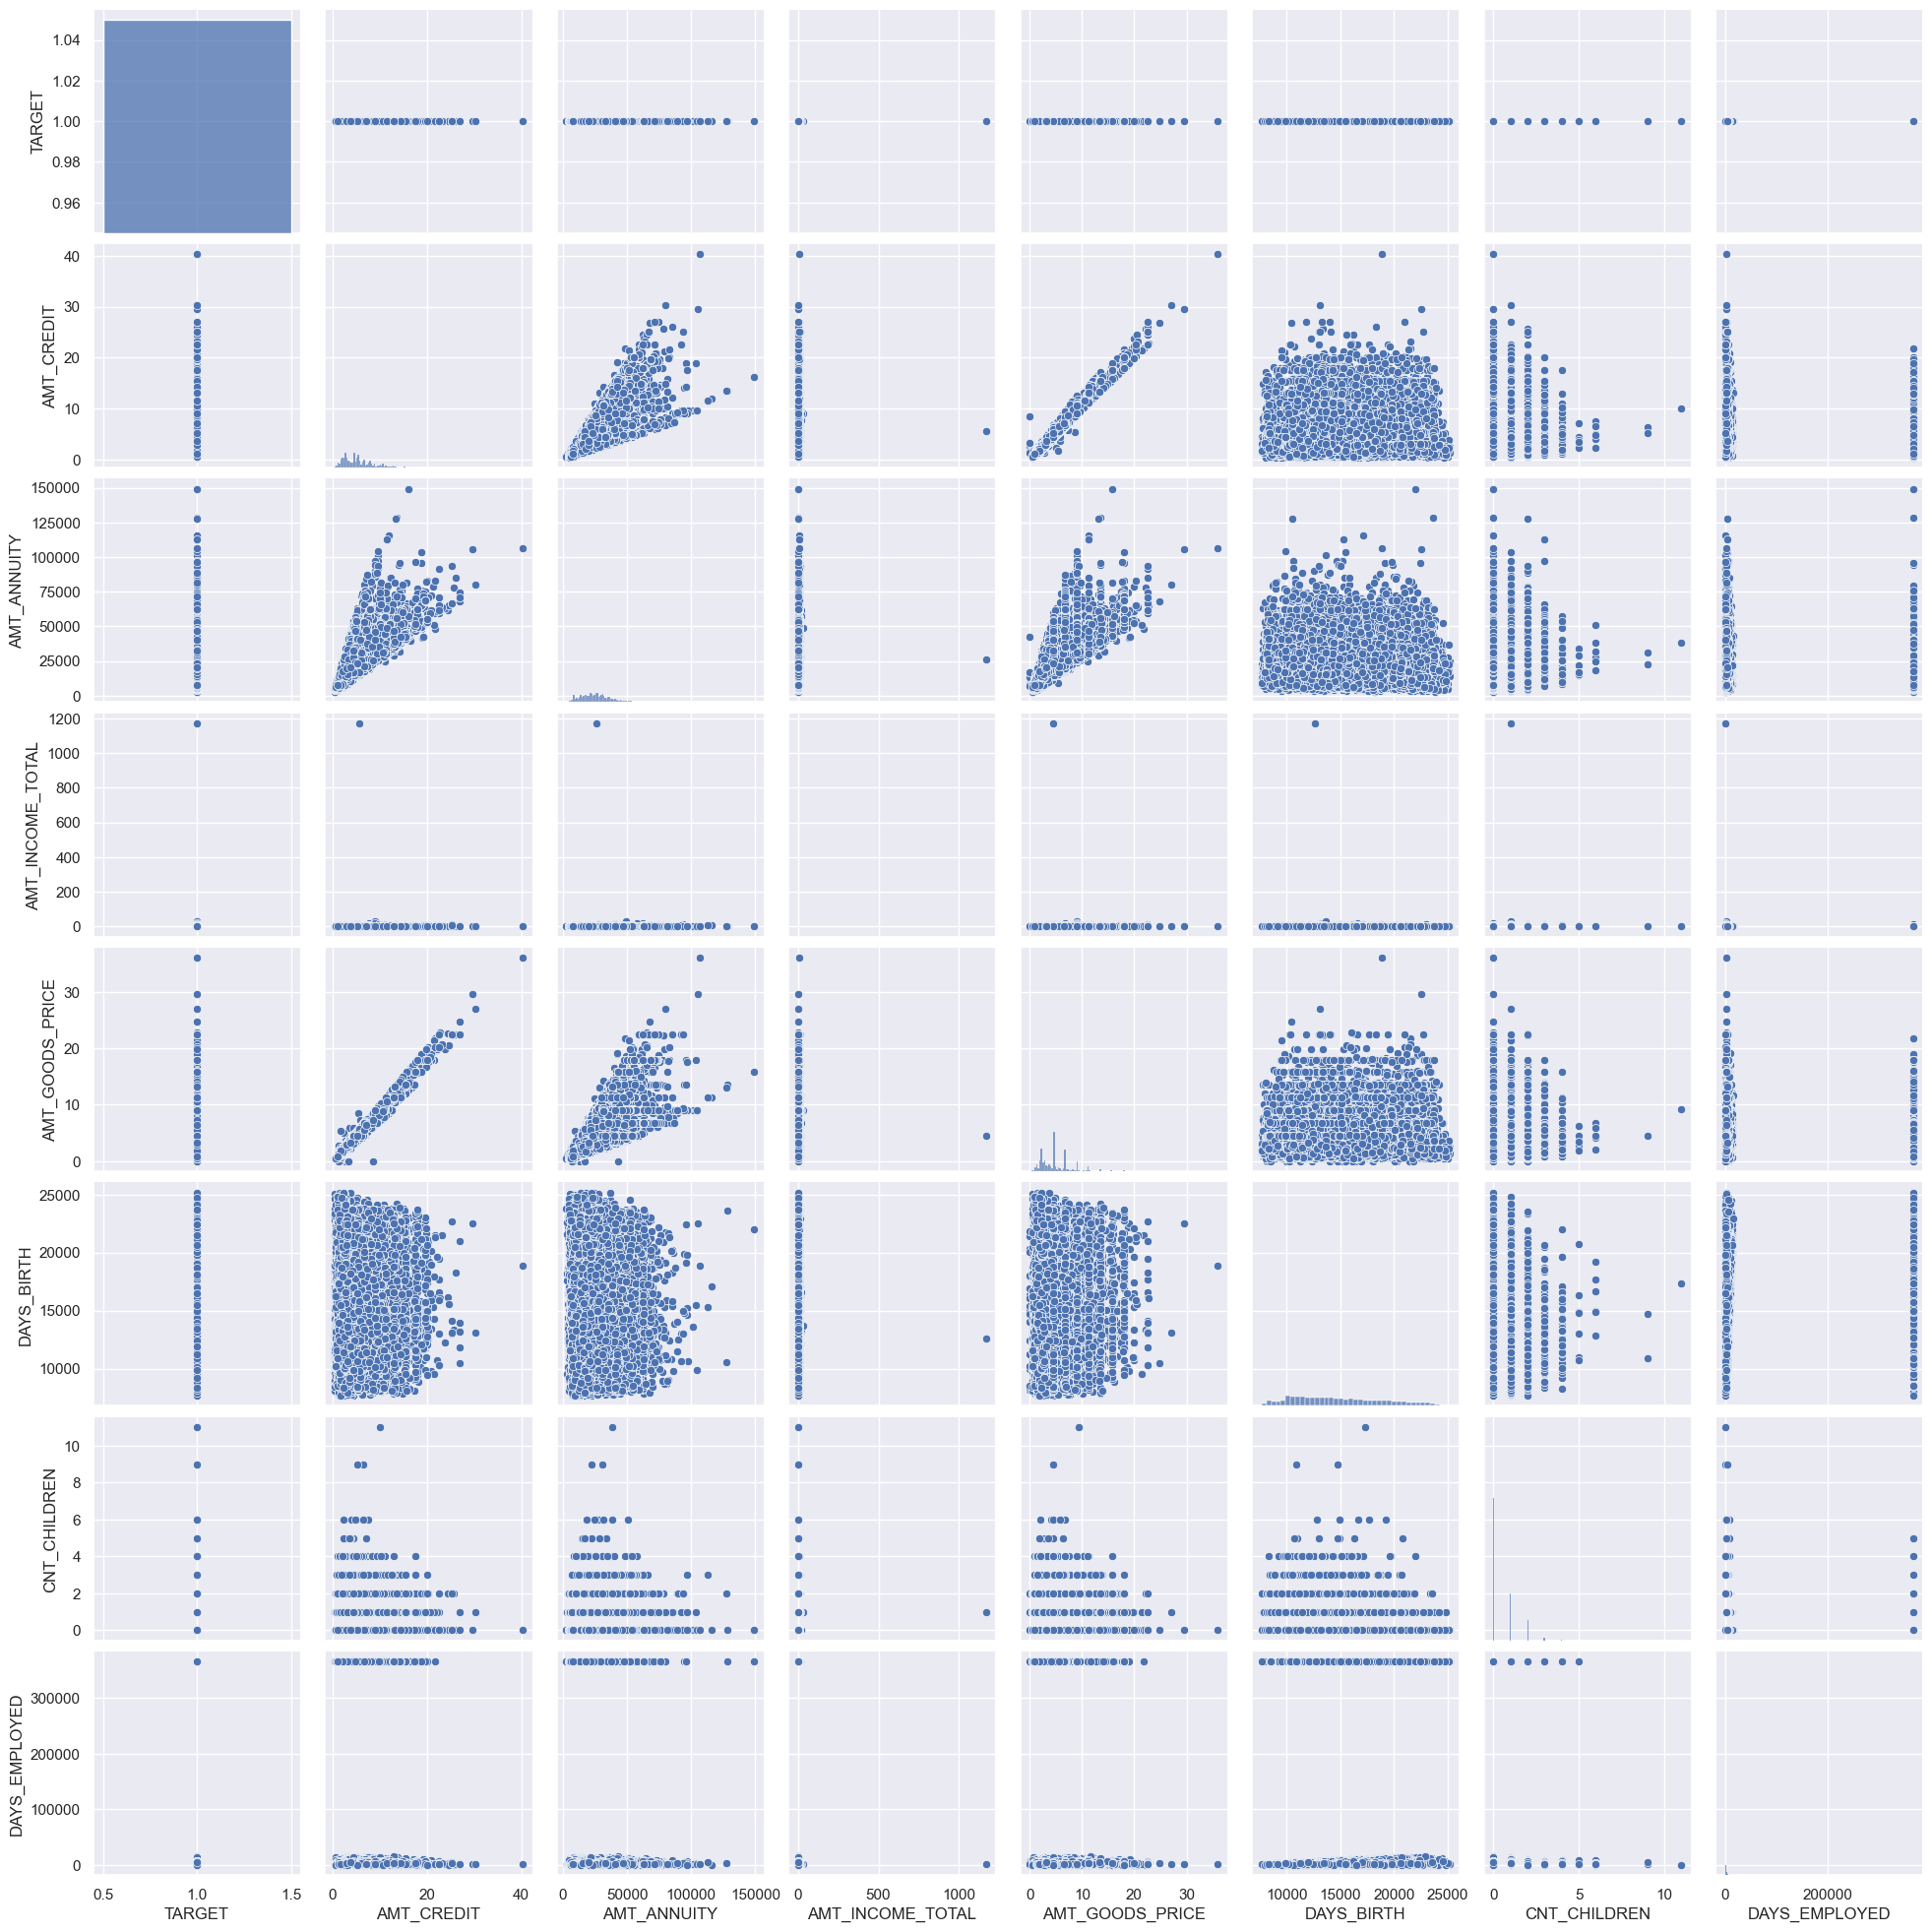

In [ ]:
pair = Target1[['TARGET','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].fillna(0)
sns.pairplot(pair)

plt.show()

# Insight:

- **`AMT_CREDIT`** and **`AMT_GOODS_PRICE`** are highly correlated variables for both defaulters and non - defaulters. So as the home price increases the loan amount also increases

- **`AMT_CREDIT`** and **`AMT_ANNUITY`** (EMI) are highly correlated variables for both defaulters and non - defaulters . So as the home price increases the EMI amount also increases which is logical
- All three variables **`AMT_CREDIT`**, **`AMT_GOODS_PRICE`** and **`AMT_ANNUITY`** are highly correlated for both defaulters and non-defaulters, which might not give a good indicator for defaulter detection

**Inferences:**
* **When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters**
* **Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line**
* **There are very less defaulters for AMT_CREDIT >20 Lakhs**

# CONCLUSION

### A. Decisive Factor whether an applicant will be Repayer:
1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **REGION_RATING_CLIENT: RATING 1 is safer.**
4. **ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%**
5. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
6. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
7. **AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default**
8. **NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.**
9. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

### B. Decisive Factor whether an applicant will be Defaulter:
1. **CODE_GENDER: Men are at relatively higher default rate**
2. **NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.**
3. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
4. **NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.**
5. **REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.**
6. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
7. **ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.**
8. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
9. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
10. **CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.**
11. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

C. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:


1. **NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.**
2. **AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.**
3. **AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.**
4. **CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.**
5. **NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.**

D. Suggestions:
* **90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**